In [1]:
# Reading the dataset
import pandas as pd 
import numpy as np 
import sklearn as sk 
import scipy as py 
import statsmodels 
import patsy 
import pandasql as ps 
from pandasql import sqldf 
from matplotlib import pyplot as plt

import json
import os
import matplotlib.pyplot as plt
import spacy
import numpy as np

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import gensim

# natural language processing
import re
import nltk
from nltk.tokenize import TweetTokenizer
import string
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import texthero as hero 
from texthero import preprocessing
from textblob import TextBlob 
from gensim.models import LdaModel
from gensim import models
from gensim import corpora
from wordcloud import WordCloud, STOPWORDS

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import rcParams

rcParams['figure.figsize'] = (12,6)

# neural network 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import layers

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from keras import backend as K

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset/import the data
Anxiety=pd.read_csv("C:\\Users\\sneka\\Desktop\\Career\\Anxiety Project\\Merged Data Set - Sheet1.csv")

In [3]:
Anxiety

,Author tag,Author username,Author avatar,Is bot,Date,Content,Mentions,Attachments,Channel,Symptom1(Edginess_or_restlessness),Symptom2(Tiring_easily_more_fatigued_than_usual),Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank),Symptom4(irritability),Symptom5(Increased_muscleaches_or_soreness),Symptom6(Difficulty_sleeping),Symptom7(No_symptoms),AnxietyIntensity
0,#6726,ColdAsIce,https://cdn.discordapp.com/avatars/80557856216...,No,3/3/2022 9:52,Does anyone else experience shaky hands when h...,The Real Novice#2721,NaN,R/SocialAnxiety,Y,N,N,N,N,N,N,1
1,#4990,Iroiry,https://cdn.discordapp.com/avatars/49282419547...,No,4/15/2022 10:38,Theater teacher in 7th grade taught everyone t...,potatophoenix#5337,NaN,R/SocialAnxiety,N,N,Y,N,N,N,N,1
2,#4289,Gorpu,https://cdn.discordapp.com/avatars/30941029302...,No,4/14/2022 10:21,"when I was forced into things like that, what ...",compcube#4275,NaN,R/SocialAnxiety,N,N,N,N,N,N,Y,0
3,#7130,notvanished_,https://cdn.discordapp.com/avatars/86941470183...,No,12/14/2021 17:15,"Hi there ✨, I don't think you're overreacting....",Labra#8101,NaN,R/SocialAnxiety,N,N,N,N,N,N,Y,0
4,#1613,Wowzers,https://cdn.discordapp.com/avatars/57037344084...,No,4/18/2022 19:54,same here!! Before quarintine i was such a soc...,jeongsachaeng#2485,NaN,R/SocialAnxiety,Y,N,Y,N,N,N,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,#2797,codey289466,https://cdn.discordapp.com/avatars/82467142732...,No,2/9/2022 10:52,<@!917388097187086386> play,JoyBot#1231,NaN,kai Havan,N,N,N,N,N,N,Y,0
1946,#9284,Omega07,https://cdn.discordapp.com/avatars/83832692955...,No,2/9/2022 6:30,<@!917388097187086386> science,JoyBot#1231,NaN,kai Havan,N,N,N,N,N,N,Y,0
1947,#5086,katie<3,https://cdn.discordapp.com/avatars/75417559922...,No,2/9/2022 9:24,<@!917388097187086386> what's the last song yo...,JoyBot#1231,NaN,kai Havan,N,N,N,N,N,N,Y,0
1948,#1867,erezt,https://discord.com/assets/6debd47ed13483642cf...,No,2/9/2022 6:37,<@!917388097187086386> Hi,JoyBot#1231,NaN,kai Havan,N,N,N,N,N,N,Y,0


In [4]:
Anxiety.shape

(1950, 17)

In [5]:
Anxiety.isnull().sum()

Author tag                                                                      0
Author username                                                                 0
Author avatar                                                                   0
Is bot                                                                          0
Date                                                                            0
Content                                                                        11
Mentions                                                                      770
Attachments                                                                  1895
Channel                                                                         3
Symptom1(Edginess_or_restlessness)                                              0
Symptom2(Tiring_easily_more_fatigued_than_usual)                                0
Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)       0
Symptom4(irritab

In [6]:
Anxiety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 17 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Author tag                                                                 1950 non-null   object
 1   Author username                                                            1950 non-null   object
 2   Author avatar                                                              1950 non-null   object
 3   Is bot                                                                     1950 non-null   object
 4   Date                                                                       1950 non-null   object
 5   Content                                                                    1939 non-null   object
 6   Mentions                                                        

In [7]:
Anxiety.dtypes

Author tag                                                                   object
Author username                                                              object
Author avatar                                                                object
Is bot                                                                       object
Date                                                                         object
Content                                                                      object
Mentions                                                                     object
Attachments                                                                  object
Channel                                                                      object
Symptom1(Edginess_or_restlessness)                                           object
Symptom2(Tiring_easily_more_fatigued_than_usual)                             object
Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)   

In [8]:
Anxiety.nunique()

Author tag                                                                   1855
Author username                                                              1940
Author avatar                                                                1830
Is bot                                                                          2
Date                                                                         1920
Content                                                                      1472
Mentions                                                                      418
Attachments                                                                    55
Channel                                                                         2
Symptom1(Edginess_or_restlessness)                                              2
Symptom2(Tiring_easily_more_fatigued_than_usual)                                2
Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)       2
Symptom4(irritab

In [9]:
Anxiety['AnxietyIntensity'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    82.21%
1    11.64%
2     3.85%
3     1.54%
4     0.62%
5     0.15%
Name: AnxietyIntensity, dtype: object

In [10]:
Anxiety['AnxietyIntensity'].value_counts()

0    1603
1     227
2      75
3      30
4      12
5       3
Name: AnxietyIntensity, dtype: int64

<AxesSubplot:>

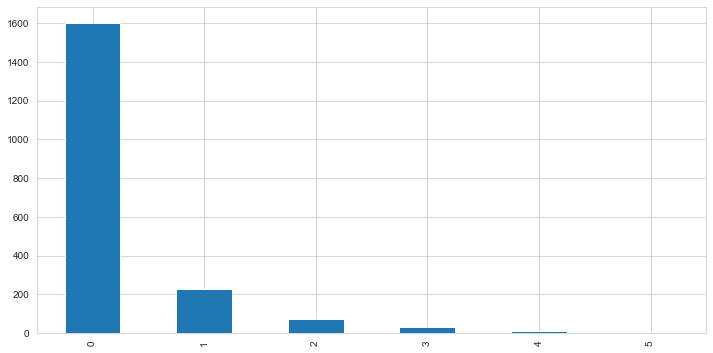

In [11]:
Anxiety['AnxietyIntensity'].value_counts().plot(kind='bar')

In [12]:
Anxiety['Symptom1(Edginess_or_restlessness)'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

N    84.0%
Y    16.0%
Name: Symptom1(Edginess_or_restlessness), dtype: object

<AxesSubplot:>

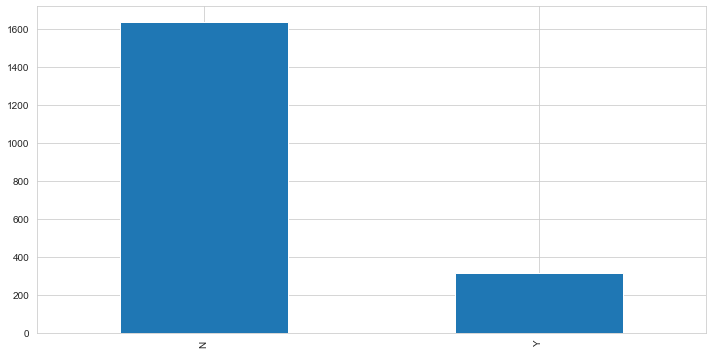

In [13]:
Anxiety['Symptom1(Edginess_or_restlessness)'].value_counts().plot(kind='bar')

In [14]:
Anxiety['Symptom2(Tiring_easily_more_fatigued_than_usual)'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

N    97.44%
Y     2.56%
Name: Symptom2(Tiring_easily_more_fatigued_than_usual), dtype: object

<AxesSubplot:>

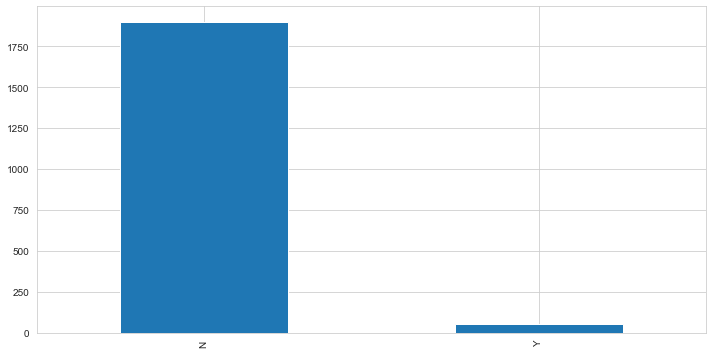

In [15]:
Anxiety['Symptom2(Tiring_easily_more_fatigued_than_usual)'].value_counts().plot(kind='bar')                            

In [16]:
Anxiety['Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

N    91.28%
Y     8.72%
Name: Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank), dtype: object

<AxesSubplot:>

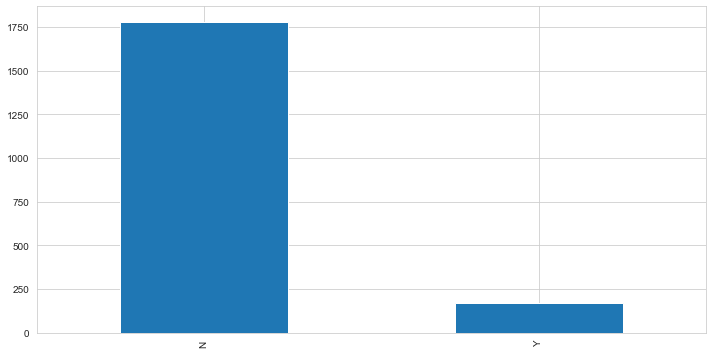

In [17]:
Anxiety['Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)'].value_counts().plot(kind='bar') 

In [18]:
Anxiety['Symptom4(irritability)'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%' 
#Anxiety['Symptom4(irritability)'].value_counts().plot(kind='bar')

N    92.82%
Y     7.18%
Name: Symptom4(irritability), dtype: object

<AxesSubplot:>

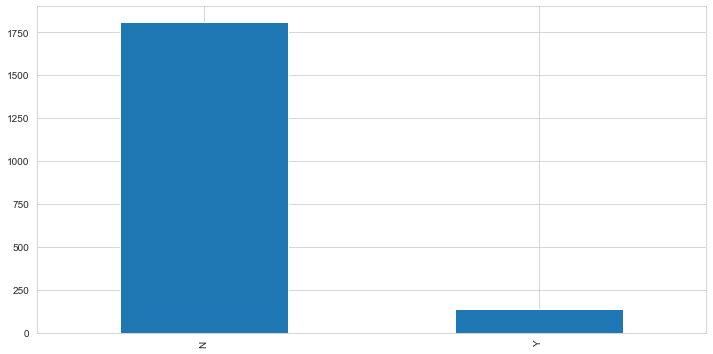

In [19]:
Anxiety['Symptom4(irritability)'].value_counts().plot(kind='bar')

In [20]:
Anxiety['Symptom5(Increased_muscleaches_or_soreness)'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

N    98.46%
Y     1.54%
Name: Symptom5(Increased_muscleaches_or_soreness), dtype: object

<AxesSubplot:>

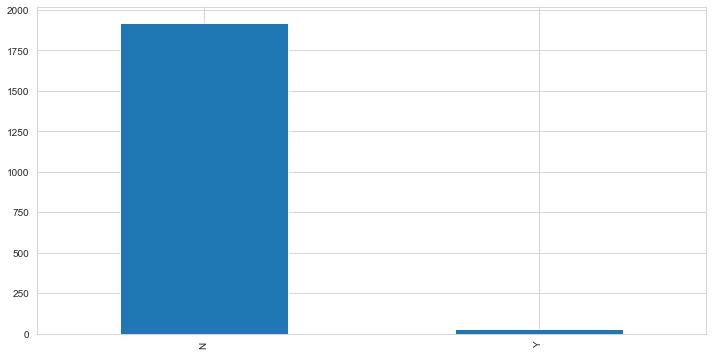

In [21]:
Anxiety['Symptom5(Increased_muscleaches_or_soreness)'].value_counts().plot(kind='bar')

In [22]:
Anxiety['Symptom6(Difficulty_sleeping)'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

N    99.03%
Y     0.97%
Name: Symptom6(Difficulty_sleeping), dtype: object

<AxesSubplot:>

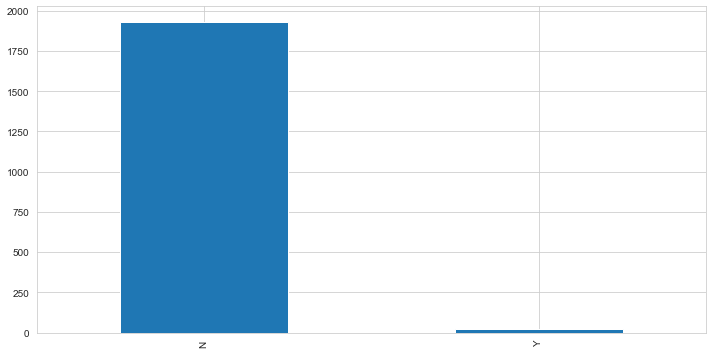

In [23]:
Anxiety['Symptom6(Difficulty_sleeping)'].value_counts().plot(kind='bar') 

In [24]:
Anxiety['Symptom7(No_symptoms)'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Y    82.21%
N    17.79%
Name: Symptom7(No_symptoms), dtype: object

<AxesSubplot:>

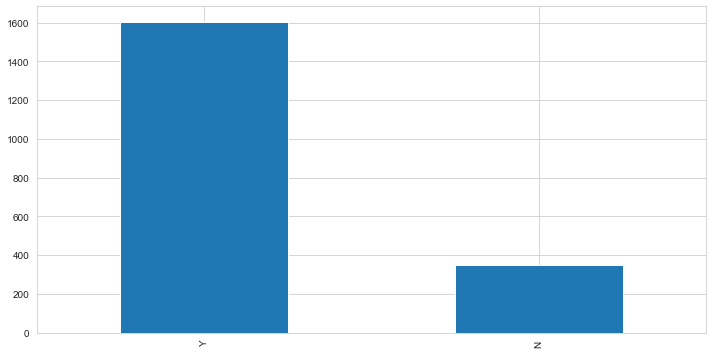

In [25]:
Anxiety['Symptom7(No_symptoms)'].value_counts().plot(kind='bar')

In [26]:
# natural language processing
import re
import nltk
from nltk.tokenize import TweetTokenizer
import string
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [27]:
Anxiety['Corrected_Content'] = Anxiety['Content']

In [28]:
#Tokenize the data
Anxiety['Corrected_Content'] = Anxiety['Corrected_Content'].map(lambda x: re.sub(r'\W+', ' ', str(x)))

In [29]:
Anxiety = Anxiety.apply(lambda x: x.astype(str).str.lower())

In [30]:
tt = TweetTokenizer()
tokens = Anxiety['Corrected_Content'].apply(tt.tokenize)
print(tokens)

0       [does, anyone, else, experience, shaky, hands,...
1       [theater, teacher, in, 7th, grade, taught, eve...
2       [when, i, was, forced, into, things, like, tha...
3       [hi, there, i, don, t, think, you, re, overrea...
4       [same, here, before, quarintine, i, was, such,...
                              ...                        
1945                       [9173880971, 8708638, 6, play]
1946                    [9173880971, 8708638, 6, science]
1947    [9173880971, 8708638, 6, what, s, the, last, s...
1948                         [9173880971, 8708638, 6, hi]
1949                                                   []
Name: Corrected_Content, Length: 1950, dtype: object


In [31]:
#Cleaning Content column with multiple commas
Anxiety['Corrected_Content']=Anxiety['Corrected_Content'].apply(lambda x: x.split(',,')[0])

In [32]:
#Cleaning Content column with three commas
Anxiety['Corrected_Content']=Anxiety['Corrected_Content'].apply(lambda x: x.split(',,,')[0])

In [33]:
#Lowercase the Content
Anxiety['Corrected_Content']=Anxiety['Corrected_Content'].apply(lambda x: x.lower())

In [34]:
#Remove digits and words containing digits
Anxiety['Corrected_Content']=Anxiety['Corrected_Content'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [35]:
#Remove Punctuations
Anxiety['Corrected_Content']=Anxiety['Corrected_Content'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [36]:
#Removing Extra Spaces
Anxiety['Corrected_Content']=Anxiety['Corrected_Content'].apply(lambda x: re.sub(' +',' ',x))

In [37]:
#Validate the content column
for index,text in enumerate(Anxiety['Corrected_Content'][35:40]):
  print('Corrected_Content %d:\n'%(index+1),text)

Corrected_Content 1:
 it took me a month and a half to really feel different with the lowest dose of ssri i could get maybe your doctor can try to switch it for another ssri to see if it suits you better
Corrected_Content 2:
 story of my fuckin life
Corrected_Content 3:
 i have to present my research paper on wednesday and i m shitting my pants
Corrected_Content 4:
 for some people the usual small talk doesnt work you could try asking more serious questions or get her opinion on things
Corrected_Content 5:
 same 


In [38]:
#Spellcheck and find errors
#pip install textblob
#pip install manual_spellchecker
from manual_spellchecker import spell_checker
ob = spell_checker(Anxiety, "Corrected_Content")
ob.spell_check()


Analyzing suspected errors


  0%|          | 0/1950 [00:00<?, ?it/s]


Total suspected errors =  1223


In [39]:
ob.get_all_errors()

['sa',
 'sa',
 'highschool',
 'sa',
 'lol',
 'quarintine',
 'hella',
 'idk',
 'covid',
 'sooo',
 'didnt',
 'didnt',
 'im',
 'vc',
 'im',
 'ou',
 'alot',
 'notifs',
 'ppl',
 'wouldn',
 'aren',
 'monday',
 'sux',
 'azz',
 'journaling',
 'ssri',
 'ssri',
 'fuckin',
 'wednesday',
 'doesnt',
 'sa',
 've',
 'heyy',
 'ytho',
 'dont',
 've',
 've',
 'sa',
 'wasnt',
 'didnt',
 'monday',
 'im',
 'i̇magine',
 'thats',
 'sa',
 'pandalove',
 'counsellors',
 'irl',
 'scambaiting',
 'btw',
 'wouldnt',
 'hasn',
 'lol',
 'cvs',
 'agh',
 'sa',
 'sa',
 've',
 'ik',
 'ive',
 'adam',
 'october',
 'dont',
 'ive',
 'dont',
 'ok',
 'adhd',
 'meds',
 'meds',
 'sarahh',
 'deprasant',
 'sa',
 'ap',
 've',
 'cbt',
 'ive',
 'meds',
 'rn',
 'im',
 'quellbre',
 'meds',
 've',
 'risperidone',
 'benzo',
 'sa',
 'uk',
 'heyoo',
 'havent',
 'convo',
 'idk',
 've',
 'wasn',
 'didn',
 'idk',
 'annoucments',
 'couldn',
 'didn',
 'carmen',
 'winstead',
 'pastelsdogtriggered',
 'afsmadge',
 'lol',
 'idk',
 've',
 'ure',
 'bc

In [40]:
def other_clean(Corrected_Content):
        """
            Other manual text cleaning techniques
        """
   
        sample_abbr = {
            "cuz" : " because ",
            "idk" : " I dont know ",
            "ppl" : " people ",
            "dont" : "do not",
            "hella":"hello",
            "hii":"hello",
            "helo":"hello",
            "im":" I am",
            "alot":" a lot",
            "wouldn":"would not",
            "wasnt":"was not",
            "wasn":"was not",
            "aren":"are not",
            "isnt":"is not",
            "sooo":"so",
            "quarintine":"quarantine",
            "lol":"laugh out loud",
            "thats":"that is",
            "btw":"between",
            "ive":" i have",
            "havent":"have not",
            "couldn" :"could not",
            "akwards":"awkward",
            "akwardly":"awkward",
            "akward":"awkward",
            "doesn":"does not",
            "whatdidyoujustsay":"what did you just say",
            "didn":"did not",
            "didnt":"did not",
            "isn":"is not",
            "anxeity":"anxiety",
            "msg":"message",
            "ve":"have",
            "ello":"hello",
            "shouldn":"should not",
            "nan":"not any",
            "cryong":"crying",
            "wthhhhh":"what the fuck",
            "omg":"oh my god",
            "I":"i"
            
        }
            

        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')


        Corrected_Content = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], Corrected_Content)

        return Corrected_Content      

In [41]:
Anxiety['Corrected_Content'] = Anxiety['Corrected_Content'].apply(lambda x: other_clean(x))

In [42]:
from manual_spellchecker import spell_checker
ob = spell_checker(Anxiety, "Corrected_Content")
ob.spell_check()


Analyzing suspected errors


  0%|          | 0/1950 [00:00<?, ?it/s]


Total suspected errors =  720


In [43]:
ob.get_all_errors()

['sa',
 'sa',
 'highschool',
 'sa',
 'dont',
 'covid',
 'vc',
 'ou',
 'notifs',
 'monday',
 'sux',
 'azz',
 'journaling',
 'ssri',
 'ssri',
 'fuckin',
 'wednesday',
 'doesnt',
 'sa',
 'heyy',
 'ytho',
 'sa',
 'monday',
 'i̇magine',
 'sa',
 'pandalove',
 'counsellors',
 'irl',
 'scambaiting',
 'wouldnt',
 'hasn',
 'cvs',
 'agh',
 'sa',
 'sa',
 'ik',
 'adam',
 'october',
 'ok',
 'adhd',
 'meds',
 'meds',
 'sarahh',
 'deprasant',
 'sa',
 'ap',
 'cbt',
 'meds',
 'rn',
 'quellbre',
 'meds',
 'risperidone',
 'benzo',
 'sa',
 'uk',
 'heyoo',
 'convo',
 'dont',
 'dont',
 'annoucments',
 'carmen',
 'winstead',
 'pastelsdogtriggered',
 'afsmadge',
 'dont',
 'ure',
 'bc',
 'vc',
 'vc',
 'bc',
 'olds',
 'uhm',
 'eyecontact',
 'smth',
 'lmao',
 'irl',
 'throught',
 'grey',
 'soooo',
 'sarahh',
 'audiobook',
 'cbt',
 'cbt',
 'mins',
 'behavioural',
 'behavioural',
 'behavioural',
 'tldr',
 'dont',
 'tht',
 'dont',
 'wht',
 'rn',
 'rlly',
 'cbd',
 'vids',
 'faruk',
 'convo',
 'wats',
 'wayyyyy',
 'ur

In [44]:
Anxiety['Corrected_Content'].head(30)

0     does anyone else experience shaky hands when h...
1     theater teacher in grade taught everyone to lo...
2     when i was forced into things like that what h...
3     hi there i don t think you re overreacting all...
4     same here before quarantine i was such a socia...
5     if i can do it you can do it i waited till i w...
6                             is pretty dead right now 
7     online school because covid or is it originall...
8     i usually feel comforted by the sea of people ...
9     this might sound stupid but everyone has some ...
10    i got a gym membership a couple weeks ago went...
11    hello does anyone else have super bad anxiety ...
12                                    i do that as well
13    how do you tell your parents that you think ou...
14    i don t even know how to get into a social sit...
15    what do you do when there s a group that talk ...
16                                          total blast
17                                          how 

Text(0, 0.5, 'Frequency of Text Length')

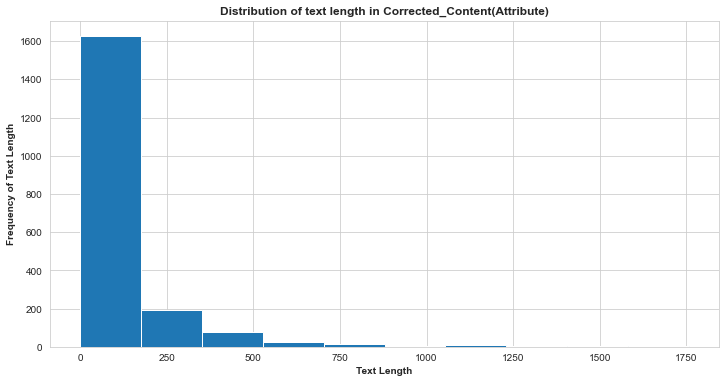

In [45]:
# add a new column, the length of the content column
Anxiety['content_length']=Anxiety['Corrected_Content'].apply(len)

#distribution of length
Anxiety['content_length'].plot.hist(bins=10)
plt.title('Distribution of text length in Corrected_Content(Attribute)', fontweight='bold')
plt.xlabel("Text Length", fontweight='bold')
plt.ylabel("Frequency of Text Length", fontweight='bold')

In [46]:
Anxiety['content_length'].mean()

98.95025641025642

In [47]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy
from textblob import TextBlob
import numpy as np
import gensim

In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#Most common words
from collections import Counter
Counter(" ".join(Anxiety["Corrected_Content"]).split()).most_common(30)

[('i', 2387),
 ('to', 1327),
 ('and', 941),
 ('a', 732),
 ('the', 655),
 ('it', 636),
 ('that', 580),
 ('you', 569),
 ('my', 521),
 ('have', 498),
 ('of', 470),
 ('me', 430),
 ('t', 411),
 ('in', 402),
 ('but', 397),
 ('not', 391),
 ('this', 376),
 ('is', 375),
 ('just', 344),
 ('with', 327),
 ('or', 327),
 ('like', 326),
 ('for', 316),
 ('do', 308),
 ('m', 287),
 ('anxiety', 276),
 ('so', 263),
 ('people', 261),
 ('s', 256),
 ('can', 251)]

In [50]:
#Remove the stop words
stop_words = stopwords.words('english')
stop_words.remove('not')
Anxiety['Corrected_Content'] = Anxiety['Corrected_Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [51]:
from collections import Counter
Counter(" ".join(Anxiety["Corrected_Content"]).split()).most_common(30)

[('not', 391),
 ('like', 326),
 ('anxiety', 276),
 ('people', 261),
 ('feel', 234),
 ('know', 212),
 ('social', 194),
 ('get', 175),
 ('anyone', 151),
 ('talk', 144),
 ('really', 144),
 ('hi', 136),
 ('I', 121),
 ('friends', 120),
 ('time', 119),
 ('think', 115),
 ('help', 111),
 ('even', 103),
 ('want', 102),
 ('hello', 98),
 ('go', 90),
 ('one', 88),
 ('would', 87),
 ('rank', 83),
 ('someone', 80),
 ('say', 79),
 ('make', 78),
 ('much', 76),
 ('question', 75),
 ('something', 73)]

In [52]:
#Find most frequent words in content column
wordcloud2 = WordCloud().generate(' '.join(Anxiety['Corrected_Content']))

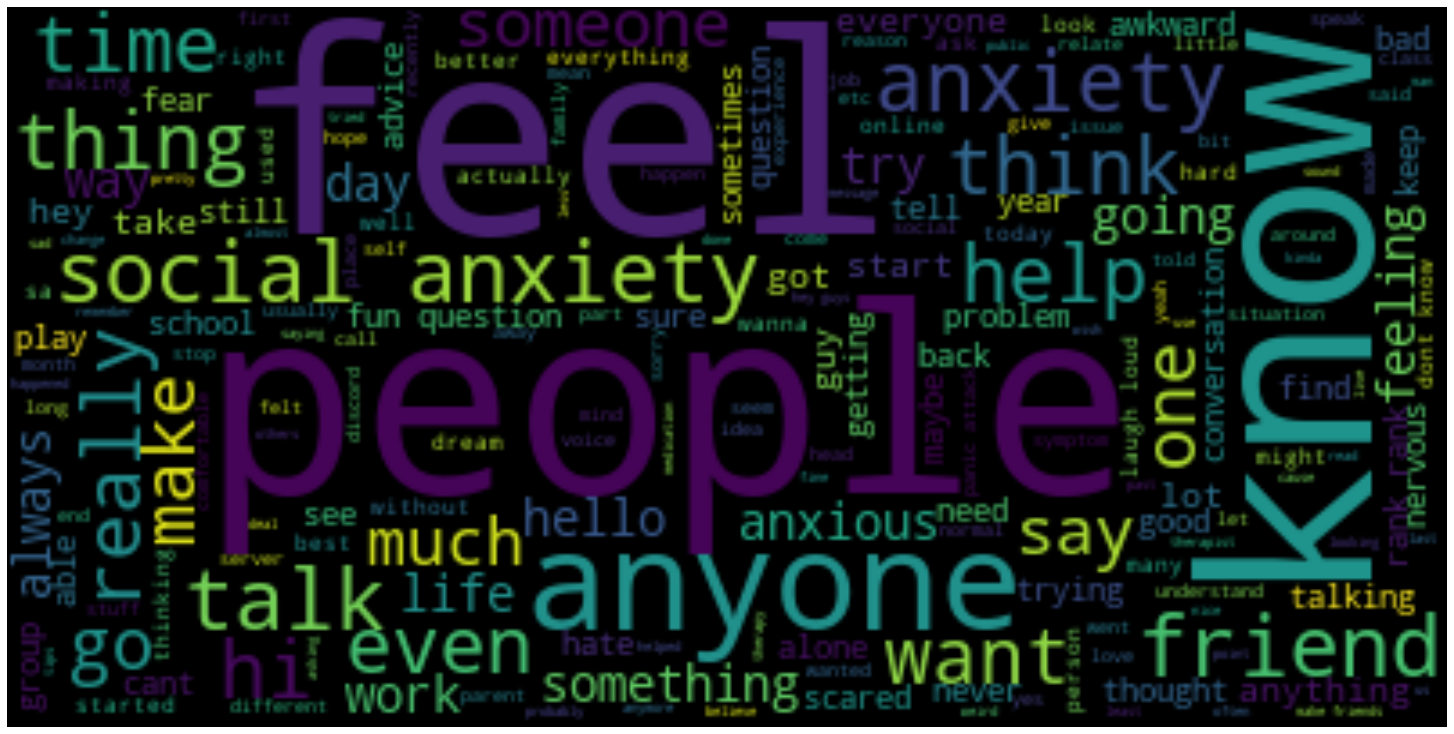

In [53]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

In [54]:
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [55]:
Anxiety['Lemmatization']=Anxiety['Corrected_Content'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [56]:
Anxiety_grouped=Anxiety[['Channel','Lemmatization']].groupby(by='Channel').agg(lambda x:' '.join(x))
Anxiety_grouped.head()

,Lemmatization
Channel,
kai havan,congratulation joybot da house game dream hel...
nan,good friend world move different continent fee...
r/socialanxiety,experience shaky hand sa symptom hide obviousl...


In [57]:
Anxiety['polarity']=Anxiety['Lemmatization'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [58]:
print("3 Random Questions with Highest Polarity:")
for index,review in enumerate(Anxiety.iloc[Anxiety['polarity'].sort_values(ascending=False)[:3].index]['Corrected_Content']):
  print('Corrected_Content {}:\n'.format(index+1),review)

3 Random Questions with Highest Polarity:
Corrected_Content 1:
 perfect trade
Corrected_Content 2:
 hello wonderful people
Corrected_Content 3:
 splendid


In [59]:
print("3 Random Questions with Lowest Polarity:")
for index,review in enumerate(Anxiety.iloc[Anxiety['polarity'].sort_values(ascending=True)[:3].index]['Corrected_Content']):
  print('Corrected_Content {}:\n'.format(index+1),review)

3 Random Questions with Lowest Polarity:
Corrected_Content 1:
 boring expendable
Corrected_Content 2:
 anyone else want socialize feels horrible
Corrected_Content 3:
 boring always lack things talk


# SMOTE

In [60]:
Anxiety['Symptom1(Edginess_or_restlessness)'].value_counts()

n    1638
y     312
Name: Symptom1(Edginess_or_restlessness), dtype: int64

In [61]:
# class count
class_count_N, class_count_Y = Anxiety['Symptom1(Edginess_or_restlessness)'].value_counts()

# Separate class
class_N = Anxiety[Anxiety['Symptom1(Edginess_or_restlessness)'] == 'n']
class_Y = Anxiety[Anxiety['Symptom1(Edginess_or_restlessness)'] == 'y']# print the shape of the class
print('class_N:', class_N.shape)
print('class_Y:', class_Y.shape)

class_N: (1638, 21)
class_Y: (312, 21)


In [62]:
class_count_N

1638

total class of 1 and 0: y    1638
n    1638
Name: Symptom1(Edginess_or_restlessness), dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

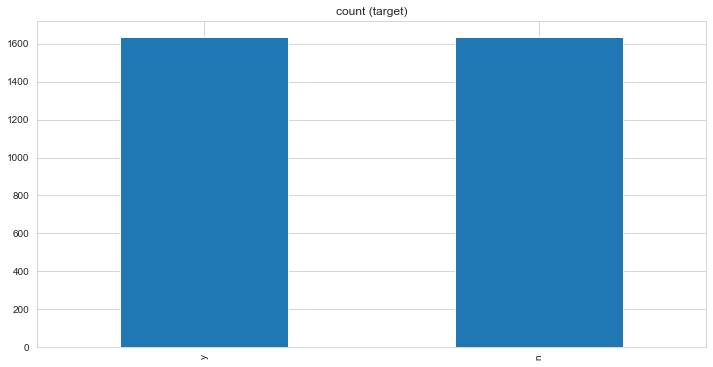

In [63]:
class_Y_over = class_Y.sample(class_count_N, replace=True)

test_over_symptom1 = pd.concat([class_Y_over, class_N], axis=0)

print("total class of 1 and 0:",test_over_symptom1['Symptom1(Edginess_or_restlessness)'].value_counts())# plot the count after under-sampeling
test_over_symptom1['Symptom1(Edginess_or_restlessness)'].value_counts().plot(kind='bar', title='count (target)')

In [64]:
Anxiety['Symptom2(Tiring_easily_more_fatigued_than_usual)'].value_counts()

n    1900
y      50
Name: Symptom2(Tiring_easily_more_fatigued_than_usual), dtype: int64

In [65]:
# class count
class_count_N, class_count_Y = Anxiety['Symptom2(Tiring_easily_more_fatigued_than_usual)'].value_counts()

# Separate class
class_N = Anxiety[Anxiety['Symptom2(Tiring_easily_more_fatigued_than_usual)'] == 'n']
class_Y = Anxiety[Anxiety['Symptom2(Tiring_easily_more_fatigued_than_usual)'] == 'y']# print the shape of the class
print('class_N:', class_N.shape)
print('class_Y:', class_Y.shape)

class_N: (1900, 21)
class_Y: (50, 21)


In [66]:
class_count_N

1900

total class of 1 and 0: y    1900
n    1900
Name: Symptom2(Tiring_easily_more_fatigued_than_usual), dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

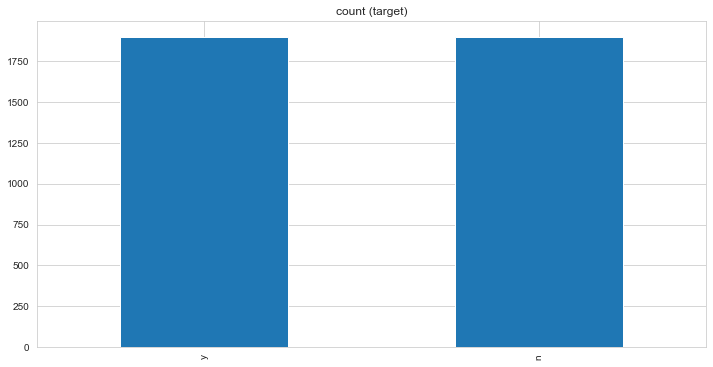

In [67]:
class_Y_over = class_Y.sample(class_count_N, replace=True)

test_over_symptom2 = pd.concat([class_Y_over, class_N], axis=0)

print("total class of 1 and 0:",test_over_symptom2['Symptom2(Tiring_easily_more_fatigued_than_usual)'].value_counts())# plot the count after under-sampeling
test_over_symptom2['Symptom2(Tiring_easily_more_fatigued_than_usual)'].value_counts().plot(kind='bar', title='count (target)')

In [68]:
Anxiety['Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)'].value_counts()

n    1780
y     170
Name: Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank), dtype: int64

In [69]:
# class count
class_count_N, class_count_Y = Anxiety['Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)'].value_counts()

# Separate class
class_N = Anxiety[Anxiety['Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)'] == 'n']
class_Y = Anxiety[Anxiety['Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)'] == 'y']# print the shape of the class
print('class_N:', class_N.shape)
print('class_Y:', class_Y.shape)

class_N: (1780, 21)
class_Y: (170, 21)


In [70]:
class_count_N

1780

total class of 1 and 0: y    1780
n    1780
Name: Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank), dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

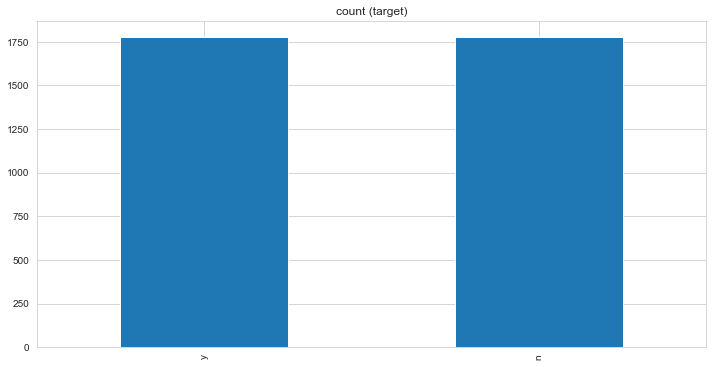

In [71]:
class_Y_over = class_Y.sample(class_count_N, replace=True)

test_over_symptom3 = pd.concat([class_Y_over, class_N], axis=0)

print("total class of 1 and 0:",test_over_symptom3['Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)'].value_counts())# plot the count after under-sampeling
test_over_symptom3['Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)'].value_counts().plot(kind='bar', title='count (target)')

In [72]:
Anxiety['Symptom4(irritability)'].value_counts()

n    1810
y     140
Name: Symptom4(irritability), dtype: int64

In [73]:
# class count
class_count_N, class_count_Y = Anxiety['Symptom4(irritability)'].value_counts()

# Separate class
class_N = Anxiety[Anxiety['Symptom4(irritability)'] == 'n']
class_Y = Anxiety[Anxiety['Symptom4(irritability)'] == 'y']
# print the shape of the class
print('class_N:', class_N.shape)
print('class_Y:', class_Y.shape)

class_N: (1810, 21)
class_Y: (140, 21)


In [74]:
class_count_N

1810

total class of 1 and 0: y    1810
n    1810
Name: Symptom4(irritability), dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

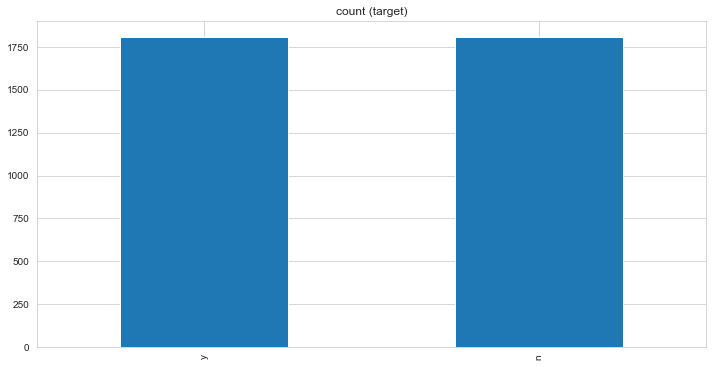

In [75]:
class_Y_over = class_Y.sample(class_count_N, replace=True)

test_over_symptom4 = pd.concat([class_Y_over, class_N], axis=0)

print("total class of 1 and 0:",test_over_symptom4['Symptom4(irritability)'].value_counts())# plot the count after under-sampeling
test_over_symptom4['Symptom4(irritability)'].value_counts().plot(kind='bar', title='count (target)')

In [76]:
Anxiety['Symptom5(Increased_muscleaches_or_soreness)'].value_counts()

n    1920
y      30
Name: Symptom5(Increased_muscleaches_or_soreness), dtype: int64

In [77]:
# class count
class_count_N, class_count_Y = Anxiety['Symptom5(Increased_muscleaches_or_soreness)'].value_counts()

# Separate class
class_N = Anxiety[Anxiety['Symptom5(Increased_muscleaches_or_soreness)'] == 'n']
class_Y = Anxiety[Anxiety['Symptom5(Increased_muscleaches_or_soreness)'] == 'y']# print the shape of the class
print('class_N:', class_N.shape)
print('class_Y:', class_Y.shape)

class_N: (1920, 21)
class_Y: (30, 21)


In [78]:
class_count_N

1920

total class of 1 and 0: y    1920
n    1920
Name: Symptom5(Increased_muscleaches_or_soreness), dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

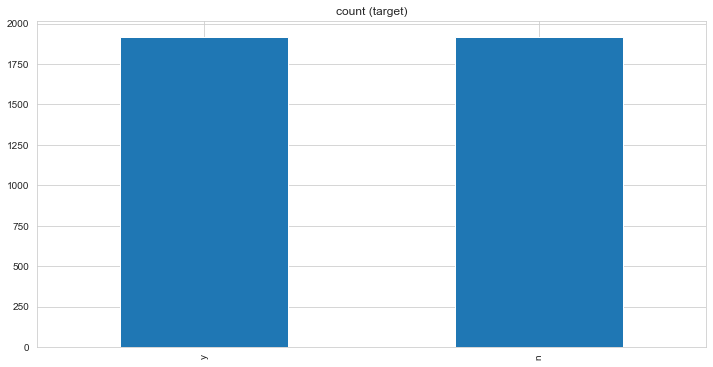

In [79]:
class_Y_over = class_Y.sample(class_count_N, replace=True)

test_over_symptom5 = pd.concat([class_Y_over, class_N], axis=0)

print("total class of 1 and 0:",test_over_symptom5['Symptom5(Increased_muscleaches_or_soreness)'].value_counts())# plot the count after under-sampeling
test_over_symptom5['Symptom5(Increased_muscleaches_or_soreness)'].value_counts().plot(kind='bar', title='count (target)')

In [80]:
Anxiety['Symptom6(Difficulty_sleeping)'].value_counts()

n    1931
y      19
Name: Symptom6(Difficulty_sleeping), dtype: int64

In [81]:
# class count
class_count_N, class_count_Y = Anxiety['Symptom6(Difficulty_sleeping)'].value_counts()

# Separate class
class_N = Anxiety[Anxiety['Symptom6(Difficulty_sleeping)'] == 'n']
class_Y = Anxiety[Anxiety['Symptom6(Difficulty_sleeping)'] == 'y']# print the shape of the class
print('class_N:', class_N.shape)
print('class_Y:', class_Y.shape)

class_N: (1931, 21)
class_Y: (19, 21)


In [82]:
class_count_N

1931

total class of 1 and 0: y    1931
n    1931
Name: Symptom6(Difficulty_sleeping), dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

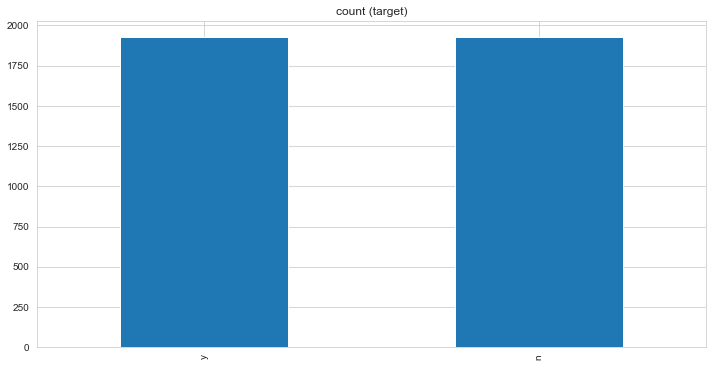

In [83]:
class_Y_over = class_Y.sample(class_count_N, replace=True)

test_over_symptom6 = pd.concat([class_Y_over, class_N], axis=0)

print("total class of 1 and 0:",test_over_symptom6['Symptom6(Difficulty_sleeping)'].value_counts())# plot the count after under-sampeling
test_over_symptom6['Symptom6(Difficulty_sleeping)'].value_counts().plot(kind='bar', title='count (target)')

In [84]:
val = pd.read_csv('Validation_set.csv')
val

,Author tag,Author username,Author avatar,Is bot,Date,Corrected_Content,Mentions,Attachments,Channel,Symptom1(Edginess_or_restlessness),Symptom2(Tiring_easily_more_fatigued_than_usual),Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank),Symptom4(irritability),Symptom5(Increased_muscleaches_or_soreness),Symptom6(Difficulty_sleeping),Symptom7(No_symptoms),AnxietyIntensity
0,#6726,ColdAsIce,https://cdn.discordapp.com/avatars/80557856216...,No,3/3/22 9:52,Does anyone else experience shaky hands when h...,The Real Novice#2721,NaN,R/SocialAnxiety,Y,N,N,N,N,N,N,1
1,#4990,Iroiry,https://cdn.discordapp.com/avatars/49282419547...,No,4/15/22 10:38,Theater teacher in 7th grade taught everyone t...,potatophoenix#5337,NaN,R/SocialAnxiety,N,N,Y,N,N,N,N,1
2,#4289,Gorpu,https://cdn.discordapp.com/avatars/30941029302...,No,4/14/22 10:21,"when I was forced into things like that, what ...",compcube#4275,NaN,R/SocialAnxiety,N,N,N,N,N,N,Y,0
3,#7130,notvanished_,https://cdn.discordapp.com/avatars/86941470183...,No,12/14/21 17:15,"Hi there âœ¨, I don't think you're overreactin...",Labra#8101,NaN,R/SocialAnxiety,N,N,N,N,N,N,Y,0
4,#1613,Wowzers,https://cdn.discordapp.com/avatars/57037344084...,No,4/18/22 19:54,same here!! Before quarintine i was such a soc...,jeongsachaeng#2485,NaN,R/SocialAnxiety,Y,N,Y,N,N,N,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,#2715,turtle_fan_69,https://discord.com/assets/6debd47ed13483642cf...,No,12/26/21 8:49,"Hi, I've got this really weird mindset in rega...",Ruben_Ninja#2814,NaN,R/SocialAnxiety,Y,N,Y,N,N,N,N,2
296,#8540,theoneandonly,https://cdn.discordapp.com/avatars/44055111454...,No,10/6/21 0:52,I hate having social anxiety I really do I fee...,NaN,NaN,R/SocialAnxiety,Y,N,Y,Y,N,N,N,3
297,#7616,moondame,https://cdn.discordapp.com/avatars/40454076576...,No,8/26/21 17:58,hi all. I'm new here,gingerninja#1458,NaN,R/SocialAnxiety,N,N,N,N,N,N,Y,0
298,#2957,eefuh,https://cdn.discordapp.com/avatars/86567285126...,No,3/3/22 6:13,Hi guys,NaN,NaN,R/SocialAnxiety,N,N,N,N,N,N,Y,0


In [85]:
val['Symptom1(Edginess_or_restlessness)'].value_counts()

N    214
Y     86
Name: Symptom1(Edginess_or_restlessness), dtype: int64

In [86]:
val.isnull().sum()

Author tag                                                                     0
Author username                                                                0
Author avatar                                                                  0
Is bot                                                                         0
Date                                                                           0
Corrected_Content                                                              0
Mentions                                                                      79
Attachments                                                                  282
Channel                                                                        0
Symptom1(Edginess_or_restlessness)                                             0
Symptom2(Tiring_easily_more_fatigued_than_usual)                               0
Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)      0
Symptom4(irritability)      

In [87]:
val.drop(['Mentions','Attachments','Author username','Channel'], axis=1, inplace=True)

In [88]:
val = val.dropna( how='any',
                    subset=['Corrected_Content'])

In [89]:
val.isnull().sum()

Author tag                                                                   0
Author avatar                                                                0
Is bot                                                                       0
Date                                                                         0
Corrected_Content                                                            0
Symptom1(Edginess_or_restlessness)                                           0
Symptom2(Tiring_easily_more_fatigued_than_usual)                             0
Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)    0
Symptom4(irritability)                                                       0
Symptom5(Increased_muscleaches_or_soreness)                                  0
Symptom6(Difficulty_sleeping)                                                0
Symptom7(No_symptoms)                                                        0
AnxietyIntensity                                    

In [90]:
df1 = pd.read_csv('Anxiety_set.csv')
df1

,Author tag,Author username,Author avatar,Is bot,Date,Content,Mentions,Attachments,Channel,Symptom1(Edginess_or_restlessness),...,Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank),Symptom4(irritability),Symptom5(Increased_muscleaches_or_soreness),Symptom6(Difficulty_sleeping),Symptom7(No_symptoms),AnxietyIntensity,Corrected_Content,content_length,Lemmatization,polarity
0,#2208,ur local weirdo,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,how do y’all talk urself into asking for help ...,npc.#5677,NaN,r/socialanxiety,y,...,n,n,n,n,n,1,talk urself asking help big group people cant ...,164,talk urself ask help big group people not shif...,0.000000
1,#2208,ur local weirdo,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,how do y’all talk urself into asking for help ...,npc.#5677,NaN,r/socialanxiety,y,...,n,n,n,n,n,1,talk urself asking help big group people cant ...,164,talk urself ask help big group people not shif...,0.000000
2,#0718,boredoom,https://cdn.discordapp.com/avatars/21520100924...,no,2/5/22 10:50,can someone relate? after many therapies and l...,NaN,NaN,r/socialanxiety,y,...,n,y,n,n,n,2,someone relate many therapies lifestyle change...,682,relate therapy lifestyle change believe contro...,-0.083929
3,#0347,baeyun,https://cdn.discordapp.com/avatars/36751889966...,no,6/29/21 18:36,the biggest mistake of my life i ever made was...,litlynx#9596,NaN,r/socialanxiety,y,...,n,n,n,n,n,2,biggest mistake life ever made moving away fam...,325,big mistake life move away family friend go is...,-0.275000
4,#6978,bagofrice,https://cdn.discordapp.com/avatars/73767068801...,no,7/14/21 3:23,is it normal for social anxiety to affect u a ...,NaN,NaN,r/socialanxiety,y,...,n,n,n,n,n,1,normal social anxiety affect u lil online caus...,141,normal social anxiety affect u lil online caus...,-0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22563,#2797,codey289466,https://cdn.discordapp.com/avatars/82467142732...,no,2/9/22 10:52,<@!917388097187086386> play,joybot#1231,NaN,kai havan,n,...,n,n,n,n,y,0,play,5,play,0.000000
22564,#9284,omega07,https://cdn.discordapp.com/avatars/83832692955...,no,2/9/22 6:30,<@!917388097187086386> science,joybot#1231,NaN,kai havan,n,...,n,n,n,n,y,0,science,8,science,0.000000
22565,#5086,katie<3,https://cdn.discordapp.com/avatars/75417559922...,no,2/9/22 9:24,<@!917388097187086386> what's the last song yo...,joybot#1231,NaN,kai havan,n,...,n,n,n,n,y,0,last song played,32,song play,0.000000
22566,#1867,erezt,https://discord.com/assets/6debd47ed13483642cf...,no,2/9/22 6:37,<@!917388097187086386> hi,joybot#1231,NaN,kai havan,n,...,n,n,n,n,y,0,hi,3,hi,0.000000


In [91]:
df1.drop(['Mentions','Attachments','Author username','Content','Channel', 'content_length','Lemmatization','polarity'], axis=1, inplace=True)                                                                    


In [92]:
df1 = df1.dropna( how='any',
                    subset=['Corrected_Content','Symptom4(irritability)'])

In [93]:
df1.shape

(21556, 13)

In [94]:
df1.isnull().sum()

Author tag                                                                   0
Author avatar                                                                0
Is bot                                                                       0
Date                                                                         0
Symptom1(Edginess_or_restlessness)                                           0
Symptom2(Tiring_easily_more_fatigued_than_usual)                             0
Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)    0
Symptom4(irritability)                                                       0
Symptom5(Increased_muscleaches_or_soreness)                                  0
Symptom6(Difficulty_sleeping)                                                0
Symptom7(No_symptoms)                                                        0
AnxietyIntensity                                                             0
Corrected_Content                                   

In [95]:
df= pd.concat([df1, val], ignore_index=True)
df

,Author tag,Author avatar,Is bot,Date,Symptom1(Edginess_or_restlessness),Symptom2(Tiring_easily_more_fatigued_than_usual),Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank),Symptom4(irritability),Symptom5(Increased_muscleaches_or_soreness),Symptom6(Difficulty_sleeping),Symptom7(No_symptoms),AnxietyIntensity,Corrected_Content
0,#2208,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,y,n,n,n,n,n,n,1,talk urself asking help big group people cant ...
1,#2208,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,y,n,n,n,n,n,n,1,talk urself asking help big group people cant ...
2,#0718,https://cdn.discordapp.com/avatars/21520100924...,no,2/5/22 10:50,y,n,n,y,n,n,n,2,someone relate many therapies lifestyle change...
3,#0347,https://cdn.discordapp.com/avatars/36751889966...,no,6/29/21 18:36,y,n,n,n,n,n,n,2,biggest mistake life ever made moving away fam...
4,#6978,https://cdn.discordapp.com/avatars/73767068801...,no,7/14/21 3:23,y,n,n,n,n,n,n,1,normal social anxiety affect u lil online caus...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21851,#2715,https://discord.com/assets/6debd47ed13483642cf...,No,12/26/21 8:49,Y,N,Y,N,N,N,N,2,"Hi, I've got this really weird mindset in rega..."
21852,#8540,https://cdn.discordapp.com/avatars/44055111454...,No,10/6/21 0:52,Y,N,Y,Y,N,N,N,3,I hate having social anxiety I really do I fee...
21853,#7616,https://cdn.discordapp.com/avatars/40454076576...,No,8/26/21 17:58,N,N,N,N,N,N,Y,0,hi all. I'm new here
21854,#2957,https://cdn.discordapp.com/avatars/86567285126...,No,3/3/22 6:13,N,N,N,N,N,N,Y,0,Hi guys


In [96]:
df.head()

,Author tag,Author avatar,Is bot,Date,Symptom1(Edginess_or_restlessness),Symptom2(Tiring_easily_more_fatigued_than_usual),Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank),Symptom4(irritability),Symptom5(Increased_muscleaches_or_soreness),Symptom6(Difficulty_sleeping),Symptom7(No_symptoms),AnxietyIntensity,Corrected_Content
0,#2208,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,y,n,n,n,n,n,n,1,talk urself asking help big group people cant ...
1,#2208,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,y,n,n,n,n,n,n,1,talk urself asking help big group people cant ...
2,#0718,https://cdn.discordapp.com/avatars/21520100924...,no,2/5/22 10:50,y,n,n,y,n,n,n,2,someone relate many therapies lifestyle change...
3,#0347,https://cdn.discordapp.com/avatars/36751889966...,no,6/29/21 18:36,y,n,n,n,n,n,n,2,biggest mistake life ever made moving away fam...
4,#6978,https://cdn.discordapp.com/avatars/73767068801...,no,7/14/21 3:23,y,n,n,n,n,n,n,1,normal social anxiety affect u lil online caus...


In [97]:
df.isnull().sum()

Author tag                                                                   0
Author avatar                                                                0
Is bot                                                                       0
Date                                                                         0
Symptom1(Edginess_or_restlessness)                                           0
Symptom2(Tiring_easily_more_fatigued_than_usual)                             0
Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)    0
Symptom4(irritability)                                                       0
Symptom5(Increased_muscleaches_or_soreness)                                  0
Symptom6(Difficulty_sleeping)                                                0
Symptom7(No_symptoms)                                                        0
AnxietyIntensity                                                             0
Corrected_Content                                   

In [98]:
df.isnull().any()

Author tag                                                                   False
Author avatar                                                                False
Is bot                                                                       False
Date                                                                         False
Symptom1(Edginess_or_restlessness)                                           False
Symptom2(Tiring_easily_more_fatigued_than_usual)                             False
Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)    False
Symptom4(irritability)                                                       False
Symptom5(Increased_muscleaches_or_soreness)                                  False
Symptom6(Difficulty_sleeping)                                                False
Symptom7(No_symptoms)                                                        False
AnxietyIntensity                                                             False
Corr

In [99]:
df.shape

(21856, 13)

In [100]:
df.rename(columns={"Symptom1(Edginess_or_restlessness)": "symp_one", 
                        "Symptom2(Tiring_easily_more_fatigued_than_usual)": "symp_two",
                  "Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)":'symp_three',
                        'Symptom4(irritability)':'symp_four',
                  'Symptom5(Increased_muscleaches_or_soreness)':'symp_five',
                  'Symptom6(Difficulty_sleeping)':'symp_six',
                  'Symptom7(No_symptoms)':'symp_seven'},inplace=True)

In [101]:
df.shape

(21856, 13)

In [102]:
df.head()

,Author tag,Author avatar,Is bot,Date,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,AnxietyIntensity,Corrected_Content
0,#2208,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,y,n,n,n,n,n,n,1,talk urself asking help big group people cant ...
1,#2208,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,y,n,n,n,n,n,n,1,talk urself asking help big group people cant ...
2,#0718,https://cdn.discordapp.com/avatars/21520100924...,no,2/5/22 10:50,y,n,n,y,n,n,n,2,someone relate many therapies lifestyle change...
3,#0347,https://cdn.discordapp.com/avatars/36751889966...,no,6/29/21 18:36,y,n,n,n,n,n,n,2,biggest mistake life ever made moving away fam...
4,#6978,https://cdn.discordapp.com/avatars/73767068801...,no,7/14/21 3:23,y,n,n,n,n,n,n,1,normal social anxiety affect u lil online caus...


In [103]:
df['symp_one'].replace({"n": "N", "N": "N",'y':'Y','N':'N'}, inplace=True)

In [104]:
df["symp_two"].replace({"n": "N", "N": "N",'y':'Y','N':'N'}, inplace=True)

In [105]:
df["symp_three"].replace({"n": "N", "N": "N",'y':'Y','N':'N'}, inplace=True)

In [106]:
df["symp_four"].replace({"n": "N", "N": "N",'y':'Y','N':'N'}, inplace=True)

In [107]:
df["symp_five"].replace({"n": "N", "N": "N",'y':'Y','N':'N'}, inplace=True)

In [108]:
df["symp_six"].replace({"n": "N", "N": "N",'y':'Y','N':'N'}, inplace=True)

In [109]:
df["symp_seven"].replace({"n": "N", "N": "N",'y':'Y','N':'N'}, inplace=True)

In [110]:
df['symp_seven'].value_counts()

N    13000
Y     8856
Name: symp_seven, dtype: int64

In [111]:
df.head()

,Author tag,Author avatar,Is bot,Date,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,AnxietyIntensity,Corrected_Content
0,#2208,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,Y,N,N,N,N,N,N,1,talk urself asking help big group people cant ...
1,#2208,https://cdn.discordapp.com/avatars/81892376918...,no,5/16/21 17:02,Y,N,N,N,N,N,N,1,talk urself asking help big group people cant ...
2,#0718,https://cdn.discordapp.com/avatars/21520100924...,no,2/5/22 10:50,Y,N,N,Y,N,N,N,2,someone relate many therapies lifestyle change...
3,#0347,https://cdn.discordapp.com/avatars/36751889966...,no,6/29/21 18:36,Y,N,N,N,N,N,N,2,biggest mistake life ever made moving away fam...
4,#6978,https://cdn.discordapp.com/avatars/73767068801...,no,7/14/21 3:23,Y,N,N,N,N,N,N,1,normal social anxiety affect u lil online caus...


In [112]:
df['symp_one']=df['symp_one'].map({'Y': 1, 'N': 0})
df['symp_two']=df['symp_two'].map({'Y': 1, 'N': 0})
df['symp_three']=df['symp_three'].map({'Y': 1, 'N': 0})
df['symp_four']=df['symp_four'].map({'Y': 1, 'N': 0})
df['symp_five']=df['symp_five'].map({'Y': 1, 'N': 0})
df['symp_six']=df['symp_six'].map({'Y': 1, 'N': 0})
df['symp_seven']=df['symp_seven'].map({'Y': 1, 'N': 0})

# Build Model for Each Symptom
# Symptom 1

In [113]:
X=df[['Corrected_Content']]
y=df['symp_one']

In [114]:
df[['Corrected_Content']]

,Corrected_Content
0,talk urself asking help big group people cant ...
1,talk urself asking help big group people cant ...
2,someone relate many therapies lifestyle change...
3,biggest mistake life ever made moving away fam...
4,normal social anxiety affect u lil online caus...
...,...
21851,"Hi, I've got this really weird mindset in rega..."
21852,I hate having social anxiety I really do I fee...
21853,hi all. I'm new here
21854,Hi guys


In [115]:
y.value_counts()

0    14399
1     7457
Name: symp_one, dtype: int64

In [116]:
X.shape

(21856, 1)

In [117]:
y.shape

(21856,)

In [118]:
# Split train-test data
cont_train, cont_test, anx_train, anx_test = X[:21556],X[21556:],y[:21556], y[21556:]

In [119]:
cont_train

,Corrected_Content
0,talk urself asking help big group people cant ...
1,talk urself asking help big group people cant ...
2,someone relate many therapies lifestyle change...
3,biggest mistake life ever made moving away fam...
4,normal social anxiety affect u lil online caus...
...,...
21551,play
21552,play
21553,science
21554,last song played


In [120]:
cont_test

,Corrected_Content
21556,Does anyone else experience shaky hands when h...
21557,Theater teacher in 7th grade taught everyone t...
21558,"when I was forced into things like that, what ..."
21559,"Hi there âœ¨, I don't think you're overreactin..."
21560,same here!! Before quarintine i was such a soc...
...,...
21851,"Hi, I've got this really weird mindset in rega..."
21852,I hate having social anxiety I really do I fee...
21853,hi all. I'm new here
21854,Hi guys


In [121]:
cont_train.values

array([['talk urself asking help big group people cant even shift sitting position I scared people look meeeeeee'],
       ['talk urself asking help big group people cant even shift sitting position I scared people look meeeeeee'],
       ['someone relate many therapies lifestyle changes believe control anxiety like not matter optimistic eat healthily work active social life voluntarily face fears still anxious none things believe hormonal explanation makes sense thing helped single medication tried dozen even medication anxiety feels completely random times people told get less anxious courageous actual permanent solution relying courage die cannot'],
       ...,
       ['science'],
       ['last song played'],
       ['hi']], dtype=object)

In [122]:
 anx_test.value_counts()

0    214
1     86
Name: symp_one, dtype: int64

In [123]:
vectorizer_sym1 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym1.fit_transform(cont_train.values.flatten())
cont_train_vec=vectorizer_sym1.transform(cont_train.values.flatten()).toarray()
cont_test_vec=vectorizer_sym1.transform(cont_test['Corrected_Content']).toarray()

In [124]:
sentences_train = cont_train.values.flatten()
sentences_test=cont_test['Corrected_Content'].values 
y_train = anx_train
y_test = anx_test

In [125]:
anx_test.value_counts()

0    214
1     86
Name: symp_one, dtype: int64

In [126]:
tokenizer_sym1 = Tokenizer(num_words=5000)
tokenizer_sym1.fit_on_texts(sentences_train)

X_train = tokenizer_sym1.texts_to_sequences(sentences_train)
X_test = tokenizer_sym1.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym1.word_index) + 1  

In [127]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Feed Forward Neural Network using keras

In [128]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','f1_m','precision_m', 'recall_m'])


In [129]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.0, epochs=100, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
674/674 [==============================] - 3s 2ms/step - loss: 17.2714 - acc: 0.7136 - f1_m: 0.6001 - precision_m: 0.6158 - recall_m: 0.6231
Epoch 2/100
674/674 [==============================] - 1s 2ms/step - loss: 1.6268 - acc: 0.8207 - f1_m: 0.7106 - precision_m: 0.7743 - recall_m: 0.6758
Epoch 3/100
674/674 [==============================] - 1s 1ms/step - loss: 0.5807 - acc: 0.8458 - f1_m: 0.7394 - precision_m: 0.8523 - recall_m: 0.6702
Epoch 4/100
674/674 [==============================] - 1s 1ms/step - loss: 0.4380 - acc: 0.8451 - f1_m: 0.7279 - precision_m: 0.8691 - recall_m: 0.6449
Epoch 5/100
674/674 [==============================] - 1s 2ms/step - loss: 0.4005 - acc: 0.8490 - f1_m: 0.7338 - precision_m: 0.8853 - recall_m: 0.6457
Epoch 6/100
674/674 [==============================] - 1s 2ms/step - loss: 0.3811 - acc: 0.8465 - f1_m: 0.7295 - precision_m: 0.8799 - recall_m: 0.6412
Epoch 7/100
674/674 [==============================] - 1s 2ms/step - loss: 0.3596 - acc

# CNN

In [130]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 500)          1717000   
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           48032     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 250)               400250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                      

In [131]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=5, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/5
472/472 [==============================] - 21s 42ms/step - loss: 0.0754 - acc: 0.9699 - f1_m: 0.9469 - precision_m: 0.9651 - recall_m: 0.9388 - val_loss: 0.0025 - val_acc: 0.9997 - val_f1_m: 0.8268 - val_precision_m: 0.8261 - val_recall_m: 0.8276
Epoch 2/5
472/472 [==============================] - 20s 42ms/step - loss: 5.2153e-04 - acc: 0.9999 - f1_m: 0.9998 - precision_m: 0.9998 - recall_m: 0.9998 - val_loss: 5.4505e-05 - val_acc: 1.0000 - val_f1_m: 0.8276 - val_precision_m: 0.8276 - val_recall_m: 0.8276
Epoch 3/5
472/472 [==============================] - 20s 42ms/step - loss: 6.1287e-05 - acc: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 2.1729e-05 - val_acc: 1.0000 - val_f1_m: 0.8276 - val_precision_m: 0.8276 - val_recall_m: 0.8276
Epoch 4/5
472/472 [==============================] - 20s 42ms/step - loss: 3.3167e-05 - acc: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 9.3215e-06 - val_acc: 1.0000 - val_f1_m: 0.82

In [132]:
import tensorflow as tf

In [133]:
from tensorflow.keras.models import Sequential
y_pred1=model.predict(X_test) 
y_pred1

array([[1.00000000e+00],
       [9.77439640e-07],
       [1.93088055e-02],
       [2.59360077e-05],
       [3.54119129e-06],
       [4.50054222e-06],
       [3.76061422e-07],
       [3.53559653e-06],
       [2.35243829e-06],
       [3.30604780e-05],
       [9.99998212e-01],
       [1.00000000e+00],
       [4.41257635e-06],
       [5.49478463e-09],
       [9.96690035e-01],
       [4.75711158e-06],
       [3.50980554e-06],
       [7.43738667e-07],
       [1.20491995e-05],
       [1.50883341e-06],
       [1.53095061e-06],
       [1.99239608e-07],
       [9.25996064e-05],
       [2.44249372e-06],
       [1.06207081e-04],
       [1.91250874e-05],
       [1.42956912e-06],
       [9.99994993e-01],
       [9.99996066e-01],
       [3.22555081e-07],
       [2.60329323e-08],
       [2.00323802e-06],
       [8.79194545e-07],
       [4.60221745e-05],
       [7.30385750e-07],
       [1.10395177e-07],
       [1.05681079e-06],
       [5.52929851e-06],
       [3.58872171e-07],
       [1.53095061e-06],


# Symptom 2

In [134]:
X=df[['Corrected_Content']]
y=df['symp_two']

In [135]:
# Split train-test data
cont_train, cont_test, anx_train, anx_test = X[:21556],X[21556:],y[:21556], y[21556:]

In [136]:
cont_train

,Corrected_Content
0,talk urself asking help big group people cant ...
1,talk urself asking help big group people cant ...
2,someone relate many therapies lifestyle change...
3,biggest mistake life ever made moving away fam...
4,normal social anxiety affect u lil online caus...
...,...
21551,play
21552,play
21553,science
21554,last song played


In [137]:
cont_test

,Corrected_Content
21556,Does anyone else experience shaky hands when h...
21557,Theater teacher in 7th grade taught everyone t...
21558,"when I was forced into things like that, what ..."
21559,"Hi there âœ¨, I don't think you're overreactin..."
21560,same here!! Before quarintine i was such a soc...
...,...
21851,"Hi, I've got this really weird mindset in rega..."
21852,I hate having social anxiety I really do I fee...
21853,hi all. I'm new here
21854,Hi guys


In [138]:
anx_test.value_counts()

0    284
1     16
Name: symp_two, dtype: int64

In [139]:
anx_train.value_counts()

0    19431
1     2125
Name: symp_two, dtype: int64

In [140]:
anx_test.value_counts()

0    284
1     16
Name: symp_two, dtype: int64

In [141]:
vectorizer_sym2 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym2.fit_transform(cont_train.values.flatten())
cont_train_vec=vectorizer_sym2.transform(cont_train.values.flatten()).toarray()
cont_test_vec=vectorizer_sym2.transform(cont_test['Corrected_Content']).toarray()

In [142]:
sentences_train = cont_train.values.flatten()
sentences_test=cont_test['Corrected_Content'].values 
y_train = anx_train
y_test = anx_test

In [143]:
y_train.value_counts()

0    19431
1     2125
Name: symp_two, dtype: int64

In [144]:
y_test.value_counts()

0    284
1     16
Name: symp_two, dtype: int64

In [145]:
tokenizer_sym2 = Tokenizer(num_words=5000)
tokenizer_sym2.fit_on_texts(sentences_train)

X_train = tokenizer_sym2.texts_to_sequences(sentences_train)
X_test = tokenizer_sym2.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym2.word_index) + 1  

In [146]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Feed Forward Neural Network using keras

In [147]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','f1_m','precision_m', 'recall_m'])


In [148]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.0, epochs=100, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
674/674 [==============================] - 2s 2ms/step - loss: 4.3415 - acc: 0.8798 - f1_m: 0.3299 - precision_m: 0.4375 - recall_m: 0.3214
Epoch 2/100
674/674 [==============================] - 1s 2ms/step - loss: 0.2212 - acc: 0.9364 - f1_m: 0.5024 - precision_m: 0.6709 - recall_m: 0.4433
Epoch 3/100
674/674 [==============================] - 1s 1ms/step - loss: 0.1015 - acc: 0.9700 - f1_m: 0.7932 - precision_m: 0.8251 - recall_m: 0.8024
Epoch 4/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0874 - acc: 0.9749 - f1_m: 0.8163 - precision_m: 0.8528 - recall_m: 0.8165
Epoch 5/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0835 - acc: 0.9746 - f1_m: 0.8137 - precision_m: 0.8412 - recall_m: 0.8221
Epoch 6/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0807 - acc: 0.9752 - f1_m: 0.8234 - precision_m: 0.8514 - recall_m: 0.8302
Epoch 7/100
674/674 [==============================] - 1s 2ms/step - loss: 0.0795 - acc:

# CNN

In [149]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 500)          1717000   
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 32)           48032     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 250)               400250    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                      

In [150]:


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=5, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/5
472/472 [==============================] - 22s 45ms/step - loss: 0.0422 - acc: 0.9842 - f1_m: 0.9040 - precision_m: 0.9212 - recall_m: 0.8972 - val_loss: 3.9239e-05 - val_acc: 1.0000 - val_f1_m: 0.1133 - val_precision_m: 0.1133 - val_recall_m: 0.1133
Epoch 2/5
472/472 [==============================] - 21s 45ms/step - loss: 0.0010 - acc: 0.9997 - f1_m: 0.9905 - precision_m: 0.9915 - recall_m: 0.9897 - val_loss: 5.4649e-07 - val_acc: 1.0000 - val_f1_m: 0.1133 - val_precision_m: 0.1133 - val_recall_m: 0.1133
Epoch 3/5
472/472 [==============================] - 21s 44ms/step - loss: 6.7358e-04 - acc: 0.9999 - f1_m: 0.9953 - precision_m: 0.9958 - recall_m: 0.9949 - val_loss: 2.9082e-08 - val_acc: 1.0000 - val_f1_m: 0.1133 - val_precision_m: 0.1133 - val_recall_m: 0.1133
Epoch 4/5
472/472 [==============================] - 21s 45ms/step - loss: 4.3923e-04 - acc: 0.9999 - f1_m: 0.9913 - precision_m: 0.9915 - recall_m: 0.9910 - val_loss: 7.8463e-06 - val_acc: 1.0000 - val_f1_m: 0.11

In [151]:
y_pred2=model.predict(X_test) 
y_pred2

array([[7.83111945e-15],
       [3.53252338e-15],
       [7.16270576e-14],
       [2.53784000e-21],
       [1.11613112e-20],
       [2.22064266e-18],
       [2.19772412e-11],
       [2.47155474e-09],
       [3.06253395e-13],
       [6.46247778e-22],
       [4.94152404e-18],
       [9.42722703e-24],
       [2.25897773e-12],
       [2.74974699e-15],
       [4.92608067e-22],
       [8.76026629e-09],
       [4.75078699e-10],
       [5.45683633e-07],
       [2.38883578e-18],
       [3.68108972e-12],
       [2.02646852e-03],
       [3.88609189e-09],
       [2.14878693e-16],
       [2.87116620e-07],
       [2.79774916e-17],
       [3.61626951e-10],
       [2.57946504e-23],
       [5.03018819e-19],
       [5.13302628e-17],
       [8.00716105e-10],
       [2.57639274e-11],
       [4.26029112e-14],
       [9.33511107e-17],
       [1.03972855e-11],
       [2.12382195e-12],
       [4.02969714e-24],
       [5.19518117e-08],
       [5.93969413e-16],
       [1.08848763e-15],
       [2.02646852e-03],


# Symptom 3

In [152]:
X=df[['Corrected_Content']]
y=df['symp_three']

In [153]:
# Split train-test data
cont_train, cont_test, anx_train, anx_test = X[:21556],X[21556:],y[:21556], y[21556:]

In [154]:
anx_test.value_counts()

0    251
1     49
Name: symp_three, dtype: int64

In [155]:
vectorizer_sym3 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym3.fit_transform(cont_train.values.flatten())
cont_train_vec=vectorizer_sym3.transform(cont_train.values.flatten()).toarray()
cont_test_vec=vectorizer_sym3.transform(cont_test['Corrected_Content']).toarray()

In [156]:
sentences_train = cont_train.values.flatten()
sentences_test=cont_test['Corrected_Content'].values 
y_train = anx_train
y_test = anx_test

In [157]:
tokenizer_sym3 = Tokenizer(num_words=5000)
tokenizer_sym3.fit_on_texts(sentences_train)

X_train = tokenizer_sym3.texts_to_sequences(sentences_train)
X_test = tokenizer_sym3.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym3.word_index) + 1 

In [158]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Feed Forward Neural Network using keras

In [159]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','f1_m','precision_m', 'recall_m'])


In [160]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.0, epochs=100, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
674/674 [==============================] - 2s 2ms/step - loss: 14.8729 - acc: 0.8235 - f1_m: 0.3094 - precision_m: 0.3629 - recall_m: 0.3311
Epoch 2/100
674/674 [==============================] - 1s 2ms/step - loss: 1.3171 - acc: 0.8993 - f1_m: 0.6166 - precision_m: 0.6114 - recall_m: 0.6879
Epoch 3/100
674/674 [==============================] - 1s 2ms/step - loss: 0.4197 - acc: 0.9142 - f1_m: 0.6861 - precision_m: 0.6258 - recall_m: 0.8162
Epoch 4/100
674/674 [==============================] - 1s 2ms/step - loss: 0.1824 - acc: 0.9250 - f1_m: 0.7389 - precision_m: 0.6570 - recall_m: 0.8995
Epoch 5/100
674/674 [==============================] - 1s 2ms/step - loss: 0.1231 - acc: 0.9352 - f1_m: 0.7682 - precision_m: 0.6776 - recall_m: 0.9389
Epoch 6/100
674/674 [==============================] - 1s 2ms/step - loss: 0.1104 - acc: 0.9424 - f1_m: 0.7894 - precision_m: 0.6993 - recall_m: 0.9537
Epoch 7/100
674/674 [==============================] - 1s 1ms/step - loss: 0.1019 - acc

# CNN

In [161]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 500)          1717000   
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 32)           48032     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 250)               400250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                      

In [162]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=5, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/5
472/472 [==============================] - 22s 45ms/step - loss: 0.0412 - acc: 0.9854 - f1_m: 0.9284 - precision_m: 0.9574 - recall_m: 0.9174 - val_loss: 2.0358e-05 - val_acc: 1.0000 - val_f1_m: 0.6847 - val_precision_m: 0.6847 - val_recall_m: 0.6847
Epoch 2/5
472/472 [==============================] - 21s 45ms/step - loss: 4.2249e-05 - acc: 1.0000 - f1_m: 0.9936 - precision_m: 0.9936 - recall_m: 0.9936 - val_loss: 6.5910e-06 - val_acc: 1.0000 - val_f1_m: 0.6847 - val_precision_m: 0.6847 - val_recall_m: 0.6847
Epoch 3/5
472/472 [==============================] - 21s 44ms/step - loss: 1.4269e-05 - acc: 1.0000 - f1_m: 0.9958 - precision_m: 0.9958 - recall_m: 0.9958 - val_loss: 2.0794e-06 - val_acc: 1.0000 - val_f1_m: 0.6847 - val_precision_m: 0.6847 - val_recall_m: 0.6847
Epoch 4/5
472/472 [==============================] - 21s 44ms/step - loss: 7.0845e-06 - acc: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 1.0750e-06 - val_acc: 1.0000 - val_f1_m: 

In [163]:
y_pred3=model.predict(X_test) 
y_pred3

array([[1.81014684e-07],
       [2.59231818e-08],
       [5.11688150e-08],
       [9.15958687e-09],
       [9.84807730e-01],
       [1.05868048e-09],
       [4.11213392e-08],
       [1.28644160e-07],
       [1.21110531e-07],
       [7.05938135e-07],
       [9.63743307e-09],
       [5.01824047e-07],
       [3.13504245e-08],
       [1.04889661e-08],
       [1.56558812e-07],
       [2.14688370e-07],
       [2.70844936e-07],
       [2.75543641e-07],
       [2.86697279e-08],
       [4.95703070e-08],
       [8.73577221e-07],
       [5.07036816e-07],
       [8.79318236e-08],
       [5.32441845e-07],
       [2.03916195e-09],
       [2.01563103e-06],
       [7.12601746e-08],
       [6.79498697e-08],
       [1.83735708e-07],
       [1.69757996e-07],
       [1.78807618e-08],
       [1.43458800e-08],
       [3.21001409e-07],
       [2.19091888e-07],
       [1.40855896e-08],
       [8.22011202e-07],
       [6.47719673e-08],
       [4.20979296e-09],
       [7.49955859e-07],
       [8.73577221e-07],


# Symptom 4

In [164]:
X=df[['Corrected_Content']]
y=df['symp_four']

In [165]:
# Split train-test data
cont_train, cont_test, anx_train, anx_test = X[:21556],X[21556:],y[:21556], y[21556:]

In [166]:
anx_test.value_counts()

0    256
1     44
Name: symp_four, dtype: int64

In [167]:
vectorizer_sym4 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym4.fit_transform(cont_train.values.flatten())
cont_train_vec=vectorizer_sym4.transform(cont_train.values.flatten()).toarray()
cont_test_vec=vectorizer_sym4.transform(cont_test['Corrected_Content']).toarray()

In [168]:
sentences_train = cont_train.values.flatten()
sentences_test=cont_test['Corrected_Content'].values 
y_train = anx_train
y_test = anx_test

In [169]:
tokenizer_sym4 = Tokenizer(num_words=5000)
tokenizer_sym4.fit_on_texts(sentences_train)

X_train = tokenizer_sym4.texts_to_sequences(sentences_train)
X_test = tokenizer_sym4.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym4.word_index) + 1 

In [170]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Feed Forward Neural Network using keras

In [171]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','f1_m','precision_m', 'recall_m'])


In [172]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.0, epochs=100, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
674/674 [==============================] - 2s 2ms/step - loss: 8.5078 - acc: 0.8318 - f1_m: 0.2424 - precision_m: 0.3131 - recall_m: 0.2521
Epoch 2/100
674/674 [==============================] - 1s 2ms/step - loss: 0.7645 - acc: 0.8771 - f1_m: 0.1560 - precision_m: 0.3001 - recall_m: 0.1154
Epoch 3/100
674/674 [==============================] - 1s 2ms/step - loss: 0.3856 - acc: 0.8817 - f1_m: 0.1576 - precision_m: 0.3297 - recall_m: 0.1156
Epoch 4/100
674/674 [==============================] - 1s 2ms/step - loss: 0.2854 - acc: 0.8837 - f1_m: 0.1685 - precision_m: 0.3415 - recall_m: 0.1236
Epoch 5/100
674/674 [==============================] - 1s 2ms/step - loss: 0.2612 - acc: 0.8890 - f1_m: 0.2152 - precision_m: 0.4073 - recall_m: 0.1582
Epoch 6/100
674/674 [==============================] - 1s 2ms/step - loss: 0.2486 - acc: 0.8946 - f1_m: 0.2753 - precision_m: 0.5118 - recall_m: 0.2056
Epoch 7/100
674/674 [==============================] - 1s 2ms/step - loss: 0.2277 - acc:

# CNN

In [173]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 500)          1717000   
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 32)           48032     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 250)               400250    
                                                                 
 dropout_3 (Dropout)         (None, 250)               0         
                                                      

In [174]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=5, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/5
472/472 [==============================] - 21s 42ms/step - loss: 0.0570 - acc: 0.9778 - f1_m: 0.8785 - precision_m: 0.8929 - recall_m: 0.8733 - val_loss: 3.4192e-05 - val_acc: 1.0000 - val_f1_m: 0.4828 - val_precision_m: 0.4828 - val_recall_m: 0.4828
Epoch 2/5
472/472 [==============================] - 19s 41ms/step - loss: 3.4272e-04 - acc: 1.0000 - f1_m: 0.9979 - precision_m: 0.9979 - recall_m: 0.9979 - val_loss: 2.3696e-06 - val_acc: 1.0000 - val_f1_m: 0.4828 - val_precision_m: 0.4828 - val_recall_m: 0.4828
Epoch 3/5
472/472 [==============================] - 19s 41ms/step - loss: 5.4337e-05 - acc: 1.0000 - f1_m: 0.9915 - precision_m: 0.9915 - recall_m: 0.9915 - val_loss: 5.4689e-07 - val_acc: 1.0000 - val_f1_m: 0.4828 - val_precision_m: 0.4828 - val_recall_m: 0.4828
Epoch 4/5
472/472 [==============================] - 19s 41ms/step - loss: 3.9051e-05 - acc: 1.0000 - f1_m: 0.9979 - precision_m: 0.9979 - recall_m: 0.9979 - val_loss: 9.0753e-08 - val_acc: 1.0000 - val_f1_m: 

In [175]:
y_pred4=model.predict(X_test) 
y_pred4

array([[6.10504580e-09],
       [2.51265925e-10],
       [4.74086121e-08],
       [1.01999624e-10],
       [1.06148619e-14],
       [1.86580420e-03],
       [2.68885625e-09],
       [4.89337604e-16],
       [1.39658152e-09],
       [5.20528598e-09],
       [8.18544364e-12],
       [1.00872899e-09],
       [4.22767062e-06],
       [1.86645757e-08],
       [1.01459975e-07],
       [9.99935627e-01],
       [4.41767734e-09],
       [1.61662825e-08],
       [2.59186823e-08],
       [2.80139550e-10],
       [8.64547474e-07],
       [7.69676305e-08],
       [3.28792886e-08],
       [4.15060377e-08],
       [4.26381419e-09],
       [4.07706624e-09],
       [7.33455185e-10],
       [1.62020314e-15],
       [2.30314150e-08],
       [8.86839074e-11],
       [9.99998987e-01],
       [1.78841049e-08],
       [1.55368740e-09],
       [7.32219291e-07],
       [7.54097641e-07],
       [1.42329509e-10],
       [2.31552733e-08],
       [9.99985576e-01],
       [6.26139629e-09],
       [8.64547474e-07],


# Symptom 5

In [176]:
X=df[['Corrected_Content']]
y=df['symp_five']

In [177]:
df['symp_five'].value_counts()

0    19660
1     2196
Name: symp_five, dtype: int64

In [178]:
# Split train-test data
cont_train, cont_test, anx_train, anx_test = X[:21556],X[21556:],y[:21556], y[21556:]

In [179]:
cont_test.value_counts()

Corrected_Content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [180]:
anx_test.value_counts()

0    295
1      5
Name: symp_five, dtype: int64

In [181]:
vectorizer_sym5 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym5.fit_transform(cont_train.values.flatten())
cont_train_vec=vectorizer_sym5.transform(cont_train.values.flatten()).toarray()
cont_test_vec=vectorizer_sym5.transform(cont_test['Corrected_Content']).toarray()

In [182]:
sentences_train = cont_train.values.flatten()
sentences_test=cont_test['Corrected_Content'].values 
y_train = anx_train
y_test = anx_test

In [183]:
tokenizer_sym5 = Tokenizer(num_words=5000)
tokenizer_sym5.fit_on_texts(sentences_train)

X_train = tokenizer_sym5.texts_to_sequences(sentences_train)
X_test = tokenizer_sym5.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym5.word_index) + 1 

In [184]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Feed Forward Neural Network using keras

In [185]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','f1_m','precision_m', 'recall_m'])


In [186]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.0, epochs=100, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
674/674 [==============================] - 2s 1ms/step - loss: 11.7627 - acc: 0.8635 - f1_m: 0.2839 - precision_m: 0.3584 - recall_m: 0.2918
Epoch 2/100
674/674 [==============================] - 1s 1ms/step - loss: 0.8929 - acc: 0.9347 - f1_m: 0.5702 - precision_m: 0.6643 - recall_m: 0.5477
Epoch 3/100
674/674 [==============================] - 1s 1ms/step - loss: 0.3708 - acc: 0.9558 - f1_m: 0.7116 - precision_m: 0.7795 - recall_m: 0.7022
Epoch 4/100
674/674 [==============================] - 1s 1ms/step - loss: 0.1300 - acc: 0.9740 - f1_m: 0.8196 - precision_m: 0.8475 - recall_m: 0.8268
Epoch 5/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0737 - acc: 0.9830 - f1_m: 0.8743 - precision_m: 0.8860 - recall_m: 0.8886
Epoch 6/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0586 - acc: 0.9776 - f1_m: 0.8512 - precision_m: 0.8484 - recall_m: 0.8889
Epoch 7/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0515 - acc

# CNN

In [187]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 500)          1717000   
                                                                 
 conv1d_4 (Conv1D)           (None, 100, 32)           48032     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 250)               400250    
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                                      

In [188]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=5, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/5
472/472 [==============================] - 21s 42ms/step - loss: 0.0412 - acc: 0.9864 - f1_m: 0.7832 - precision_m: 0.8028 - recall_m: 0.7784 - val_loss: 3.9295e-05 - val_acc: 1.0000 - val_f1_m: 0.2167 - val_precision_m: 0.2167 - val_recall_m: 0.2167
Epoch 2/5
472/472 [==============================] - 19s 41ms/step - loss: 1.9183e-04 - acc: 1.0000 - f1_m: 0.9216 - precision_m: 0.9216 - recall_m: 0.9216 - val_loss: 1.7394e-06 - val_acc: 1.0000 - val_f1_m: 0.2167 - val_precision_m: 0.2167 - val_recall_m: 0.2167
Epoch 3/5
472/472 [==============================] - 19s 41ms/step - loss: 0.0016 - acc: 0.9995 - f1_m: 0.9124 - precision_m: 0.9138 - recall_m: 0.9126 - val_loss: 1.2861e-04 - val_acc: 1.0000 - val_f1_m: 0.2167 - val_precision_m: 0.2167 - val_recall_m: 0.2167
Epoch 4/5
472/472 [==============================] - 19s 41ms/step - loss: 5.9912e-05 - acc: 1.0000 - f1_m: 0.9216 - precision_m: 0.9216 - recall_m: 0.9216 - val_loss: 1.4330e-06 - val_acc: 1.0000 - val_f1_m: 0.21

In [189]:
y_pred5=model.predict(X_test) 
y_pred5

array([[9.18502623e-16],
       [9.98661265e-10],
       [3.69428790e-07],
       [2.66713366e-12],
       [2.18252448e-17],
       [1.27556920e-03],
       [7.35074761e-12],
       [2.35452150e-32],
       [9.43543021e-09],
       [3.45795779e-20],
       [8.94369301e-11],
       [3.45386472e-16],
       [2.92007885e-09],
       [2.47781650e-14],
       [2.68360236e-05],
       [1.89577962e-21],
       [2.52344745e-09],
       [1.88652820e-07],
       [1.08435025e-10],
       [2.82953572e-09],
       [3.92615220e-05],
       [1.93138718e-13],
       [2.31203343e-22],
       [8.46164880e-07],
       [8.29065350e-09],
       [4.07416219e-11],
       [1.07677298e-08],
       [1.96155462e-21],
       [4.01782497e-20],
       [1.81274284e-11],
       [2.21552594e-12],
       [2.92781533e-12],
       [1.02079120e-12],
       [9.53682229e-13],
       [3.92588726e-14],
       [2.44379222e-11],
       [2.86652971e-12],
       [1.08668008e-09],
       [9.64512182e-16],
       [3.92615220e-05],


# Symptom 6

In [190]:
X=df[['Corrected_Content']]
y=df['symp_six']

In [191]:
df['symp_six'].value_counts()

0    19776
1     2080
Name: symp_six, dtype: int64

In [192]:
# Split train-test data
cont_train, cont_test, anx_train, anx_test = X[:21556],X[21556:],y[:21556], y[21556:]

In [193]:
anx_test.value_counts()

0    292
1      8
Name: symp_six, dtype: int64

In [194]:
vectorizer_sym6 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym6.fit_transform(cont_train.values.flatten())
cont_train_vec=vectorizer_sym6.transform(cont_train.values.flatten()).toarray()
cont_test_vec=vectorizer_sym6.transform(cont_test['Corrected_Content']).toarray()

In [195]:
sentences_train = cont_train.values.flatten()
sentences_test=cont_test['Corrected_Content'].values 
y_train = anx_train
y_test = anx_test

In [196]:
tokenizer_sym6 = Tokenizer(num_words=5000)
tokenizer_sym6.fit_on_texts(sentences_train)

X_train = tokenizer_sym6.texts_to_sequences(sentences_train)
X_test = tokenizer_sym6.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_sym6.word_index) + 1 

In [197]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Feed Forward Neural Network using keras

In [198]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','f1_m','precision_m', 'recall_m'])


In [199]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.0, epochs=100, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
674/674 [==============================] - 2s 2ms/step - loss: 5.4281 - acc: 0.8921 - f1_m: 0.4205 - precision_m: 0.5043 - recall_m: 0.4160
Epoch 2/100
674/674 [==============================] - 1s 1ms/step - loss: 0.2176 - acc: 0.9630 - f1_m: 0.7273 - precision_m: 0.8383 - recall_m: 0.6839
Epoch 3/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0852 - acc: 0.9750 - f1_m: 0.7798 - precision_m: 0.8776 - recall_m: 0.7324
Epoch 4/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0587 - acc: 0.9797 - f1_m: 0.8232 - precision_m: 0.9194 - recall_m: 0.7706
Epoch 5/100
674/674 [==============================] - 1s 1ms/step - loss: 0.0512 - acc: 0.9802 - f1_m: 0.8365 - precision_m: 0.9357 - recall_m: 0.7817
Epoch 6/100
674/674 [==============================] - 1s 2ms/step - loss: 0.0461 - acc: 0.9801 - f1_m: 0.8185 - precision_m: 0.9214 - recall_m: 0.7632
Epoch 7/100
674/674 [==============================] - 1s 2ms/step - loss: 0.0542 - acc:

# CNN

In [200]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 500)          1717000   
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 32)           48032     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_22 (Dense)            (None, 250)               400250    
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                     

In [201]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=5, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/5
472/472 [==============================] - 21s 42ms/step - loss: 0.0209 - acc: 0.9941 - f1_m: 0.1250 - precision_m: 0.1292 - recall_m: 0.1229 - val_loss: 0.0070 - val_acc: 1.0000 - val_f1_m: 0.3498 - val_precision_m: 0.3498 - val_recall_m: 0.3498
Epoch 2/5
472/472 [==============================] - 19s 41ms/step - loss: 1.4434e-04 - acc: 1.0000 - f1_m: 0.2394 - precision_m: 0.2394 - recall_m: 0.2394 - val_loss: 3.9994e-04 - val_acc: 1.0000 - val_f1_m: 0.3498 - val_precision_m: 0.3498 - val_recall_m: 0.3498
Epoch 3/5
472/472 [==============================] - 19s 41ms/step - loss: 2.8160e-05 - acc: 1.0000 - f1_m: 0.2225 - precision_m: 0.2225 - recall_m: 0.2225 - val_loss: 4.7321e-05 - val_acc: 1.0000 - val_f1_m: 0.3498 - val_precision_m: 0.3498 - val_recall_m: 0.3498
Epoch 4/5
472/472 [==============================] - 19s 41ms/step - loss: 9.0648e-06 - acc: 1.0000 - f1_m: 0.2373 - precision_m: 0.2373 - recall_m: 0.2373 - val_loss: 2.1654e-05 - val_acc: 1.0000 - val_f1_m: 0.34

In [202]:
y_pred6=model.predict(X_test) 
y_pred6

array([[9.58467936e-08],
       [2.39415279e-08],
       [1.95993337e-08],
       [1.76029751e-08],
       [4.21992219e-09],
       [2.91874021e-05],
       [5.66985960e-08],
       [3.22758808e-07],
       [7.81785019e-08],
       [3.80300695e-12],
       [4.80853714e-07],
       [9.97279286e-01],
       [4.05344203e-08],
       [4.47416326e-08],
       [4.60743848e-07],
       [2.05253858e-09],
       [1.69392429e-08],
       [8.11958856e-09],
       [1.95151695e-09],
       [6.94016233e-10],
       [6.98557926e-07],
       [8.53476664e-11],
       [1.25317108e-08],
       [3.55094954e-07],
       [2.29823427e-09],
       [1.62495269e-07],
       [3.89442818e-07],
       [1.13205667e-09],
       [3.15889974e-13],
       [9.98745531e-09],
       [1.27458495e-11],
       [2.28324781e-09],
       [5.30792033e-09],
       [8.90322895e-07],
       [2.16306162e-07],
       [2.23206413e-08],
       [4.26682423e-09],
       [6.08385176e-10],
       [7.41504635e-08],
       [6.98557926e-07],


# Symptom 7

In [203]:
X=df[['Corrected_Content']]
y=df['symp_seven']

In [204]:
# Split train-test data
cont_train, cont_test, anx_train, anx_test = X[:21556],X[21556:],y[:21556], y[21556:]

In [205]:
anx_test.value_counts()

1    199
0    101
Name: symp_seven, dtype: int64

In [206]:
vectorizer_None = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_None.fit_transform(cont_train.values.flatten())
cont_train_vec=vectorizer_None.transform(cont_train.values.flatten()).toarray()
cont_test_vec=vectorizer_None.transform(cont_test['Corrected_Content']).toarray()

In [207]:
sentences_train = cont_train.values.flatten()
sentences_test=cont_test['Corrected_Content'].values 
y_train = anx_train
y_test = anx_test

In [208]:
tokenizer_None = Tokenizer(num_words=5000)
tokenizer_None.fit_on_texts(sentences_train)

X_train = tokenizer_None.texts_to_sequences(sentences_train)
X_test = tokenizer_None.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer_None.word_index) + 1 

In [209]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Feed Forward Neural Network using keras

In [210]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc','f1_m','precision_m', 'recall_m'])


In [211]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.0, epochs=100, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/100
674/674 [==============================] - 2s 2ms/step - loss: 10.9417 - acc: 0.7152 - f1_m: 0.6677 - precision_m: 0.6230 - recall_m: 0.7422
Epoch 2/100
674/674 [==============================] - 1s 1ms/step - loss: 1.1643 - acc: 0.7757 - f1_m: 0.6949 - precision_m: 0.7546 - recall_m: 0.6641
Epoch 3/100
674/674 [==============================] - 1s 1ms/step - loss: 0.5421 - acc: 0.8047 - f1_m: 0.7187 - precision_m: 0.8264 - recall_m: 0.6524
Epoch 4/100
674/674 [==============================] - 1s 1ms/step - loss: 0.4298 - acc: 0.8348 - f1_m: 0.7638 - precision_m: 0.8730 - recall_m: 0.6933
Epoch 5/100
674/674 [==============================] - 1s 1ms/step - loss: 0.3936 - acc: 0.8436 - f1_m: 0.7744 - precision_m: 0.8833 - recall_m: 0.7032
Epoch 6/100
674/674 [==============================] - 1s 1ms/step - loss: 0.3809 - acc: 0.8513 - f1_m: 0.7890 - precision_m: 0.8857 - recall_m: 0.7246
Epoch 7/100
674/674 [==============================] - 1s 1ms/step - loss: 0.3740 - acc

# CNN

In [212]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 500)          1717000   
                                                                 
 conv1d_6 (Conv1D)           (None, 100, 32)           48032     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_26 (Dense)            (None, 250)               400250    
                                                                 
 dropout_6 (Dropout)         (None, 250)               0         
                                                     

In [213]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=5, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/5
472/472 [==============================] - 21s 42ms/step - loss: 0.0960 - acc: 0.9602 - f1_m: 0.9371 - precision_m: 0.9465 - recall_m: 0.9355 - val_loss: 0.0046 - val_acc: 0.9997 - val_f1_m: 0.5613 - val_precision_m: 0.5616 - val_recall_m: 0.5611
Epoch 2/5
472/472 [==============================] - 20s 42ms/step - loss: 0.0034 - acc: 0.9995 - f1_m: 0.9995 - precision_m: 0.9996 - recall_m: 0.9994 - val_loss: 0.0026 - val_acc: 0.9997 - val_f1_m: 0.5613 - val_precision_m: 0.5616 - val_recall_m: 0.5611
Epoch 3/5
472/472 [==============================] - 20s 42ms/step - loss: 0.0025 - acc: 0.9995 - f1_m: 0.9992 - precision_m: 0.9991 - recall_m: 0.9994 - val_loss: 0.0028 - val_acc: 0.9997 - val_f1_m: 0.5613 - val_precision_m: 0.5616 - val_recall_m: 0.5611
Epoch 4/5
472/472 [==============================] - 20s 42ms/step - loss: 0.0024 - acc: 0.9996 - f1_m: 0.9994 - precision_m: 0.9994 - recall_m: 0.9996 - val_loss: 0.0023 - val_acc: 0.9997 - val_f1_m: 0.5613 - val_precision_m: 0.

In [214]:
y_pred7=model.predict(X_test) 
y_pred7

array([[1.46427098e-07],
       [9.99991596e-01],
       [9.99589562e-01],
       [9.76353049e-01],
       [8.64982605e-04],
       [9.99955058e-01],
       [9.99992967e-01],
       [9.99979794e-01],
       [9.99993086e-01],
       [9.99992371e-01],
       [4.27159783e-08],
       [1.50263309e-04],
       [9.99994159e-01],
       [9.99975979e-01],
       [7.26482451e-01],
       [6.49184130e-06],
       [9.99996185e-01],
       [9.99998271e-01],
       [9.99123573e-01],
       [9.99997139e-01],
       [9.99997497e-01],
       [9.99997020e-01],
       [9.99982595e-01],
       [9.99998212e-01],
       [9.98540163e-01],
       [9.99951363e-01],
       [9.99896288e-01],
       [5.98576761e-08],
       [4.27126884e-04],
       [9.99992371e-01],
       [1.07399263e-10],
       [9.99999166e-01],
       [9.99989152e-01],
       [9.99940515e-01],
       [9.99991775e-01],
       [9.99943852e-01],
       [9.99996185e-01],
       [8.59295906e-05],
       [9.99777555e-01],
       [9.99997497e-01],


# Random Forest Regressor

In [221]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
y = df[['AnxietyIntensity']]
# Remove the labels from the features
# axis 1 refers to the columns
X= df[['symp_one','symp_two','symp_three','symp_four','symp_five','symp_six','symp_seven']]
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(X)


In [222]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = (X[:21556],X[21556:],y[:21556],y[21556:])

In [223]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (21556, 7)
Training Labels Shape: (21556, 1)
Testing Features Shape: (300, 7)
Testing Labels Shape: (300, 1)


In [224]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [225]:
y_pred = np.concatenate((y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7), axis=1)
print(y_pred)

[[1.00000000e+00 7.83111945e-15 1.81014684e-07 ... 9.18502623e-16
  9.58467936e-08 1.46427098e-07]
 [9.77439640e-07 3.53252338e-15 2.59231818e-08 ... 9.98661265e-10
  2.39415279e-08 9.99991596e-01]
 [1.93088055e-02 7.16270576e-14 5.11688150e-08 ... 3.69428790e-07
  1.95993337e-08 9.99589562e-01]
 ...
 [5.81420090e-06 2.83106844e-13 2.35657645e-08 ... 1.85132065e-09
  3.39261869e-10 9.99995708e-01]
 [2.42875672e-06 1.87158625e-13 1.85368556e-08 ... 7.81173737e-12
  2.00025309e-11 9.99998093e-01]
 [7.63854530e-07 1.06294787e-16 1.93982530e-07 ... 1.25940793e-20
  3.03951753e-10 9.99958873e-01]]


In [226]:
# Use the forest's predict method on the test data
predictions = rf.predict(list(np.round(y_pred, decimals = 0)))
# Calculate the absolute errors
np.mean(np.absolute(np.round(predictions, decimals=0).astype(int) - test_labels.values.flatten()))
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

0.18333333333333332

# Logistic Regression

In [31]:
# Upload a correct file from your local machine
#from io import BytesIO
#from google.colab import files
#uploaded_file = files.upload()
#for name in uploaded_file.keys():
#    filename = name
#data = BytesIO(uploaded_file[filename])
import pandas as pd
data1 = pd.read_csv('Anxiety_set1.csv')
data2 = pd.read_csv('Validation_set.csv')
data2 = data2.rename(columns={"Content":"Corrected_Content"}).apply(lambda x: x.astype(str).str.lower())

In [32]:
data1

,Author tag,Author username,Author avatar,Is bot,Date,Content,Mentions,Attachments,Channel,Symptom1(Edginess_or_restlessness),...,Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank),Symptom4(irritability),Symptom5(Increased_muscle_aches_or_soreness),Symptom6(Difficulty_sleeping),Symptom7(No_symptoms),Anxiety_Intensity,Corrected_Content,content_length,Lemmatization,polarity
0,#8109,nowhy,https://cdn.discordapp.com/avatars/69853105196...,no,6/17/2021 23:50,i just typed something on a server and my hear...,nyx#4051,NaN,r/socialanxiety,y,...,y,n,n,n,n,2,typed something server heart started beating f...,189,type server heart start beat fast n fekt weird...,0.066667
1,#1229,joanwatson05,https://cdn.discordapp.com/avatars/83684176780...,no,4/29/2021 11:11,i wish i was better socially i stammer so much...,calibri#4238,NaN,r/socialanxiety,y,...,y,y,n,n,n,1,wish better socially stammer much disgusting,67,wish well socially stammer disgusting,-0.483333
2,#1581,tickleyetimbers,https://cdn.discordapp.com/avatars/43167798620...,no,12/7/2021 13:43,just seeing if this is a common theme. when i ...,NaN,NaN,r/socialanxiety,y,...,y,n,n,n,n,3,seeing common theme little girl molested one f...,735,see common theme little girl molest finally te...,-0.108681
3,#4324,syndicate,https://cdn.discordapp.com/avatars/40945968518...,no,7/13/2021 5:33,have gotten an interview with a company where ...,NaN,NaN,r/socialanxiety,y,...,y,n,n,n,n,1,gotten interview company assessment programmin...,281,get interview company assessment programming l...,0.167677
4,#9037,swaggydudejñ„dñ„,https://cdn.discordapp.com/avatars/40619847750...,no,4/19/2021 8:39,"oof, today the practical part of my apprentice...",tiger_kit#8800,NaN,r/socialanxiety,y,...,y,n,n,n,n,1,oof today practical part apprenticeship starte...,373,oof today practical apprenticeship start new p...,-0.160606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769,#2797,codey289466,https://cdn.discordapp.com/avatars/82467142732...,no,2/9/2022 10:52,<@!917388097187086386> play,joybot#1231,NaN,kai havan,n,...,n,n,n,n,y,0,play,5,play,0.000000
18770,#9284,omega07,https://cdn.discordapp.com/avatars/83832692955...,no,2/9/2022 6:30,<@!917388097187086386> science,joybot#1231,NaN,kai havan,n,...,n,n,n,n,y,0,science,8,science,0.000000
18771,#5086,katie<3,https://cdn.discordapp.com/avatars/75417559922...,no,2/9/2022 9:24,<@!917388097187086386> what's the last song yo...,joybot#1231,NaN,kai havan,n,...,n,n,n,n,y,0,last song played,32,song play,0.000000
18772,#1867,erezt,https://discord.com/assets/6debd47ed13483642cf...,no,2/9/2022 6:37,<@!917388097187086386> hi,joybot#1231,NaN,kai havan,n,...,n,n,n,n,y,0,hi,3,hi,0.000000


In [33]:
data2

,Author tag,Author username,Author avatar,Is bot,Date,Corrected_Content,Mentions,Attachments,Channel,Symptom1(Edginess_or_restlessness),Symptom2(Tiring_easily_more_fatigued_than_usual),Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank),Symptom4(irritability),Symptom5(Increased_muscleaches_or_soreness),Symptom6(Difficulty_sleeping),Symptom7(No_symptoms),AnxietyIntensity
0,#6726,coldasice,https://cdn.discordapp.com/avatars/80557856216...,no,3/3/22 9:52,does anyone else experience shaky hands when h...,the real novice#2721,nan,r/socialanxiety,y,n,n,n,n,n,n,1
1,#4990,iroiry,https://cdn.discordapp.com/avatars/49282419547...,no,4/15/22 10:38,theater teacher in 7th grade taught everyone t...,potatophoenix#5337,nan,r/socialanxiety,n,n,y,n,n,n,n,1
2,#4289,gorpu,https://cdn.discordapp.com/avatars/30941029302...,no,4/14/22 10:21,"when i was forced into things like that, what ...",compcube#4275,nan,r/socialanxiety,n,n,n,n,n,n,y,0
3,#7130,notvanished_,https://cdn.discordapp.com/avatars/86941470183...,no,12/14/21 17:15,"hi there âœ¨, i don't think you're overreactin...",labra#8101,nan,r/socialanxiety,n,n,n,n,n,n,y,0
4,#1613,wowzers,https://cdn.discordapp.com/avatars/57037344084...,no,4/18/22 19:54,same here!! before quarintine i was such a soc...,jeongsachaeng#2485,nan,r/socialanxiety,y,n,y,n,n,n,n,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,#2715,turtle_fan_69,https://discord.com/assets/6debd47ed13483642cf...,no,12/26/21 8:49,"hi, i've got this really weird mindset in rega...",ruben_ninja#2814,nan,r/socialanxiety,y,n,y,n,n,n,n,2
296,#8540,theoneandonly,https://cdn.discordapp.com/avatars/44055111454...,no,10/6/21 0:52,i hate having social anxiety i really do i fee...,nan,nan,r/socialanxiety,y,n,y,y,n,n,n,3
297,#7616,moondame,https://cdn.discordapp.com/avatars/40454076576...,no,8/26/21 17:58,hi all. i'm new here,gingerninja#1458,nan,r/socialanxiety,n,n,n,n,n,n,y,0
298,#2957,eefuh,https://cdn.discordapp.com/avatars/86567285126...,no,3/3/22 6:13,hi guys,nan,nan,r/socialanxiety,n,n,n,n,n,n,y,0


In [ ]:
def launch_fe(data1,data2):
    import os
    import pandas as pd
    from io import StringIO
    import json
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.feature_extraction import text
    import pickle
    from scipy import sparse
    MAX_TEXT_FEATURES = 2000
    columns_list = ["Symptom1(Edginess_or_restlessness)", "Corrected_Content"]

    dataset = pd.concat([data1,data2]) #pd.read_csv(data, skipinitialspace=True)
    num_samples = len(dataset)

    # Fill values missing in text features
    text_model_impute = \
        SimpleImputer(strategy='constant', fill_value='missing').fit(dataset[["Corrected_Content"]])
    # Save the model
    model_name = "99abce82-e06f-4fce-aee3-988b1db92000"
    fh = open(model_name, "wb")
    pickle.dump(text_model_impute, fh)
    fh.close()

    text_features = ["Corrected_Content"]
    dataset[text_features] = text_model_impute.transform(dataset[text_features]) 

    # Encode text into numbers.
    # Encode one text column at a time.
    text_model = []
    for text_feature in ["Corrected_Content"]:
        model = TfidfVectorizer(stop_words='english',
                                max_df=int(num_samples/2),
                                max_features=MAX_TEXT_FEATURES,
                                decode_error='ignore').fit(dataset[text_feature])
        text_model.append(model)
    # Save the model
    model_name = "9289ab12-2de4-4939-b7e7-33a4fe4f0927"
    fh = open(model_name, "wb")
    pickle.dump(text_model, fh)
    fh.close()

    for model, feature in zip(text_model, ["Corrected_Content"]):
        data = model.transform(dataset[feature])
        new_feature_names = model.get_feature_names()
        new_feature_names = [feature + '_' + i for i in new_feature_names]
        if (sparse.issparse(data)):
            data = data.toarray()
        dataframe = pd.DataFrame(data, columns=new_feature_names)
        dataset = dataset.drop(feature, axis=1)
        # reset_index to re-order the index of the new dataframe.
        dataset = pd.concat([dataset.reset_index(drop=True), dataframe.reset_index(drop=True)], axis=1)

    # Encode labels into numbers starting with 0
    label = "Symptom1(Edginess_or_restlessness)"
    tmpCol = dataset[label].astype('category')
    dict_encoding = { label: dict(enumerate(tmpCol.cat.categories))}
    # Save the model
    model_name = "6f9d512e-6fbc-4847-af52-626d49da038e"
    fh = open(model_name, "wb")
    pickle.dump(dict_encoding, fh)
    fh.close()

    label = "Symptom1(Edginess_or_restlessness)"
    dataset[label] = tmpCol.cat.codes

    # Move the label column
    cols = list(dataset.columns)
    colIdx = dataset.columns.get_loc("Symptom1(Edginess_or_restlessness)")
    # Do nothing if the label is in the 0th position
    # Otherwise, change the order of columns to move label to 0th position
    if colIdx != 0:
        cols = cols[colIdx:colIdx+1] + cols[0:colIdx] + cols[colIdx+1:]
        dataset = dataset[cols]

    # split dataset into train and test
    #train, test = train_test_split(dataset, test_size=0.2, random_state=42)
    train = dataset[:len(data1)]
    test = dataset[len(data1):]

    # Write train and test csv
    train.to_csv('/content/sample_data/train.csv', index=False,header=1)
    test.to_csv('/content/sample_data/test.csv', index=False,header=1)
    column_names = list(train.columns)
def get_model_id():
    return "6f9d512e-6fbc-4847-af52-626d49da038e"


In [ ]:
launch_fe(data1,data2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
train = train.drop(columns=['Author tag', 'Author username',
       'Author avatar', 'Is bot', 'Date', 'Mentions', 'Attachments', 'Channel','Symptom2(Tiring_easily_more_fatigued_than_usual)',
       'Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)',
       'Symptom4(irritability)',
       'Symptom5(Increased_muscle_aches_or_soreness)',
       'Symptom6(Difficulty_sleeping)', 'Symptom7(No_symptoms)','Anxiety_Intensity' ])
test = test.drop(columns=['Author tag', 'Author username',
       'Author avatar', 'Is bot', 'Date', 'Mentions', 'Attachments', 'Channel','Symptom2(Tiring_easily_more_fatigued_than_usual)',
       'Symptom3(Impaired_concentration_or_feeling_as_though_the_mind_goes_blank)',
       'Symptom4(irritability)',
       'Symptom5(Increased_muscle_aches_or_soreness)',
       'Symptom6(Difficulty_sleeping)', 'Symptom7(No_symptoms)','Anxiety_Intensity'])

In [ ]:
train.columns

Index(['Symptom1(Edginess_or_restlessness)', 'Corrected_Content_able',
       'Corrected_Content_abroad', 'Corrected_Content_absolutely',
       'Corrected_Content_abt', 'Corrected_Content_abuse',
       'Corrected_Content_abused', 'Corrected_Content_academics',
       'Corrected_Content_accent', 'Corrected_Content_accept',
       ...
       'Corrected_Content_zone', 'Corrected_Content_zoom',
       'Corrected_Content_zooms', 'Corrected_Content_ðÿ',
       'Corrected_Content_ðÿœ', 'Corrected_Content_œa',
       'Corrected_Content_œfollowâ', 'Corrected_Content_œi',
       'Corrected_Content_œtalking', 'Corrected_Content_œwhat'],
      dtype='object', length=2001)

In [ ]:
test

,Symptom1(Edginess_or_restlessness),Corrected_Content_able,Corrected_Content_abroad,Corrected_Content_absolutely,Corrected_Content_abt,Corrected_Content_abuse,Corrected_Content_abused,Corrected_Content_academics,Corrected_Content_accent,Corrected_Content_accept,...,Corrected_Content_zone,Corrected_Content_zoom,Corrected_Content_zooms,Corrected_Content_ðÿ,Corrected_Content_ðÿœ,Corrected_Content_œa,Corrected_Content_œfollowâ,Corrected_Content_œi,Corrected_Content_œtalking,Corrected_Content_œwhat
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.187457,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
296,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
297,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
298,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.isnull().any()

Symptom1(Edginess_or_restlessness)    False
Corrected_Content_able                False
Corrected_Content_abroad              False
Corrected_Content_absolutely          False
Corrected_Content_abt                 False
                                      ...  
Corrected_Content_œa                  False
Corrected_Content_œfollowâ            False
Corrected_Content_œi                  False
Corrected_Content_œtalking            False
Corrected_Content_œwhat               False
Length: 2001, dtype: bool

In [ ]:
test.isnull().any()

Symptom1(Edginess_or_restlessness)    False
Corrected_Content_able                False
Corrected_Content_abroad              False
Corrected_Content_absolutely          False
Corrected_Content_abt                 False
                                      ...  
Corrected_Content_œa                  False
Corrected_Content_œfollowâ            False
Corrected_Content_œi                  False
Corrected_Content_œtalking            False
Corrected_Content_œwhat               False
Length: 2001, dtype: bool

In [ ]:

# import the library of the algorithm
from sklearn.linear_model import LogisticRegression

# Initialize hyperparams
fit_intercept = True
max_iter = 100
C = 1.0

# Initialize the algorithm
model = LogisticRegression(random_state=0, max_iter=max_iter, fit_intercept=fit_intercept, C=C)


In [ ]:

import pandas as pd
# Load the test and train datasets
#train = pd.read_csv('/content/sample_data/train.csv', skipinitialspace=True, header=1)
#test = pd.read_csv('/content/sample_data/test.csv', skipinitialspace=True, header=1)
# Train the algorithm
model.fit(train.iloc[:,1:], train.iloc[:,0])


LogisticRegression(random_state=0)

In [ ]:

# Predict the class labels
y_pred = model.predict(test.iloc[:,1:])
# import the library to calculate confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# calculate confusion matrix
confusion_matrix = confusion_matrix(test.iloc[:,0], y_pred)
#encoded_matrix = encode_confusion_matrix(confusion_matrix)
print('Confusion matrix of the model is: ', confusion_matrix)
# calculate accuracy
score = model.score(test.iloc[:, 1:], test.iloc[:, 0])
# The value is returned as a decimal value between 0 and 1
# converting to percentage
accuracy = score * 100
print('Accuracy of the model is: ', accuracy)
print('Precision: %.3f' % precision_score(test.iloc[:,0], y_pred))
print('Recall: %.3f' % recall_score(test.iloc[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(test.iloc[:,0], y_pred))


Confusion matrix of the model is:  [[188  26]
 [ 53  33]]
Accuracy of the model is:  73.66666666666667
Precision: 0.559
Recall: 0.384
F1 Score: 0.455


# Random Forest(Symptom1)

In [ ]:

# import the library of the algorithm
from sklearn.ensemble import RandomForestClassifier

# Initialize hyperparams
max_depth = None
n_estimators = 10

# Initialize the algorithm
model = RandomForestClassifier(max_depth=max_depth, random_state=0, n_estimators=n_estimators)


In [ ]:

import pandas as pd
# Load the test and train datasets
#train = pd.read_csv('/content/sample_data/train.csv', skipinitialspace=True, header=1)
#test = pd.read_csv('/content/sample_data/test.csv', skipinitialspace=True, header=1)
# Train the algorithm
model.fit(train.iloc[:,1:], train.iloc[:,0])


RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:

# Predict the class labels
y_pred = model.predict(test.iloc[:,1:])
# import the library to calculate confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# calculate confusion matrix
confusion_matrix = confusion_matrix(test.iloc[:,0], y_pred)
#encoded_matrix = encode_confusion_matrix(confusion_matrix)
print('Confusion matrix of the model is: ', confusion_matrix)
# calculate accuracy
score = model.score(test.iloc[:, 1:], test.iloc[:, 0])
# The value is returned as a decimal value between 0 and 1
# converting to percentage
accuracy = score * 100
print('Accuracy of the model is: ', accuracy)
print('Precision: %.3f' % precision_score(test.iloc[:,0], y_pred))
print('Recall: %.3f' % recall_score(test.iloc[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(test.iloc[:,0], y_pred))


Confusion matrix of the model is:  [[188  26]
 [ 52  34]]
Accuracy of the model is:  74.0
Precision: 0.567
Recall: 0.395
F1 Score: 0.466


# MLP classifier(Symptom1)

In [46]:

# import the library of the algorithm
from sklearn.neural_network import MLPClassifier

# Initialize hyperparams
hidden_layer_sizes = (100,)
activation = 'relu'
solver = 'adam'
alpha = 0.0001
learning_rate = 'constant'
learning_rate_init = 0.001
max_iter = 200
early_stopping = True

# Initialize the algorithm
model = MLPClassifier(random_state=1, hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate=learning_rate, learning_rate_init=learning_rate_init, max_iter=max_iter, early_stopping=early_stopping)


In [ ]:

import pandas as pd
# Load the test and train datasets
#train = pd.read_csv('/content/sample_data/train.csv', skipinitialspace=True, header=1)
#test = pd.read_csv('/content/sample_data/test.csv', skipinitialspace=True, header=1)
# Train the algorithm
model.fit(train.iloc[:,1:], train.iloc[:,0])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

MLPClassifier(early_stopping=True, random_state=1)

In [ ]:

# Predict the class labels
y_pred = model.predict(test.iloc[:,1:])
# import the library to calculate confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# calculate confusion matrix
confusion_matrix = confusion_matrix(test.iloc[:,0], y_pred)
#encoded_matrix = encode_confusion_matrix(confusion_matrix)
print('Confusion matrix of the model is: ', confusion_matrix)
# calculate accuracy
score = model.score(test.iloc[:, 1:], test.iloc[:, 0])
# The value is returned as a decimal value between 0 and 1
# converting to percentage
accuracy = score * 100
print('Accuracy of the model is: ', accuracy)
print('Precision: %.3f' % precision_score(test.iloc[:,0], y_pred))
print('Recall: %.3f' % recall_score(test.iloc[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(test.iloc[:,0], y_pred))


Confusion matrix of the model is:  [[198  16]
 [ 64  22]]
Accuracy of the model is:  73.33333333333333
Precision: 0.579
Recall: 0.256
F1 Score: 0.355
